In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preamble import *
%matplotlib inline

## 모델 평가와 성능 향상

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인공적으로 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


### 크로스 밸리데이션

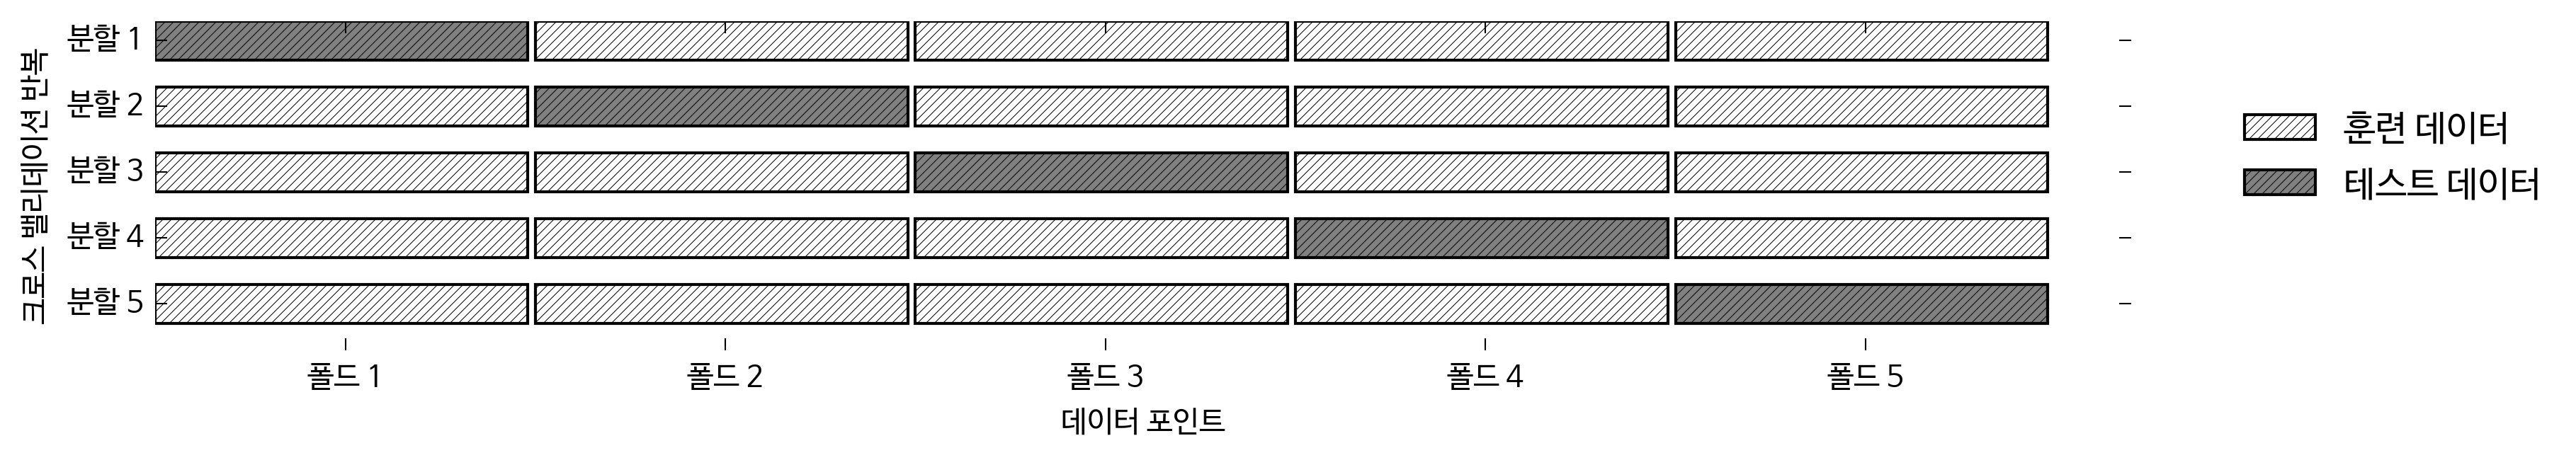

In [4]:
mglearn.plots.plot_cross_validation()

#### scikit-learn 에서의 크로스 밸리데이션

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("크로스 밸리데이션 점수: {}".format(scores))

크로스 밸리데이션 점수: [ 0.961  0.922  0.958]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("크로스 밸리데이션 점수: {}".format(scores))

크로스 밸리데이션 점수: [ 1.     0.967  0.933  0.9    1.   ]


In [7]:
print("크로스 밸리데이션 평균 점수: {:.2f}".format(scores.mean()))

크로스 밸리데이션 평균 점수: 0.96


### 크로스 밸리데이션의 장점

### 계층별(Stratified) k-폴드 크로스 밸리데이션과 그외 전략들

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


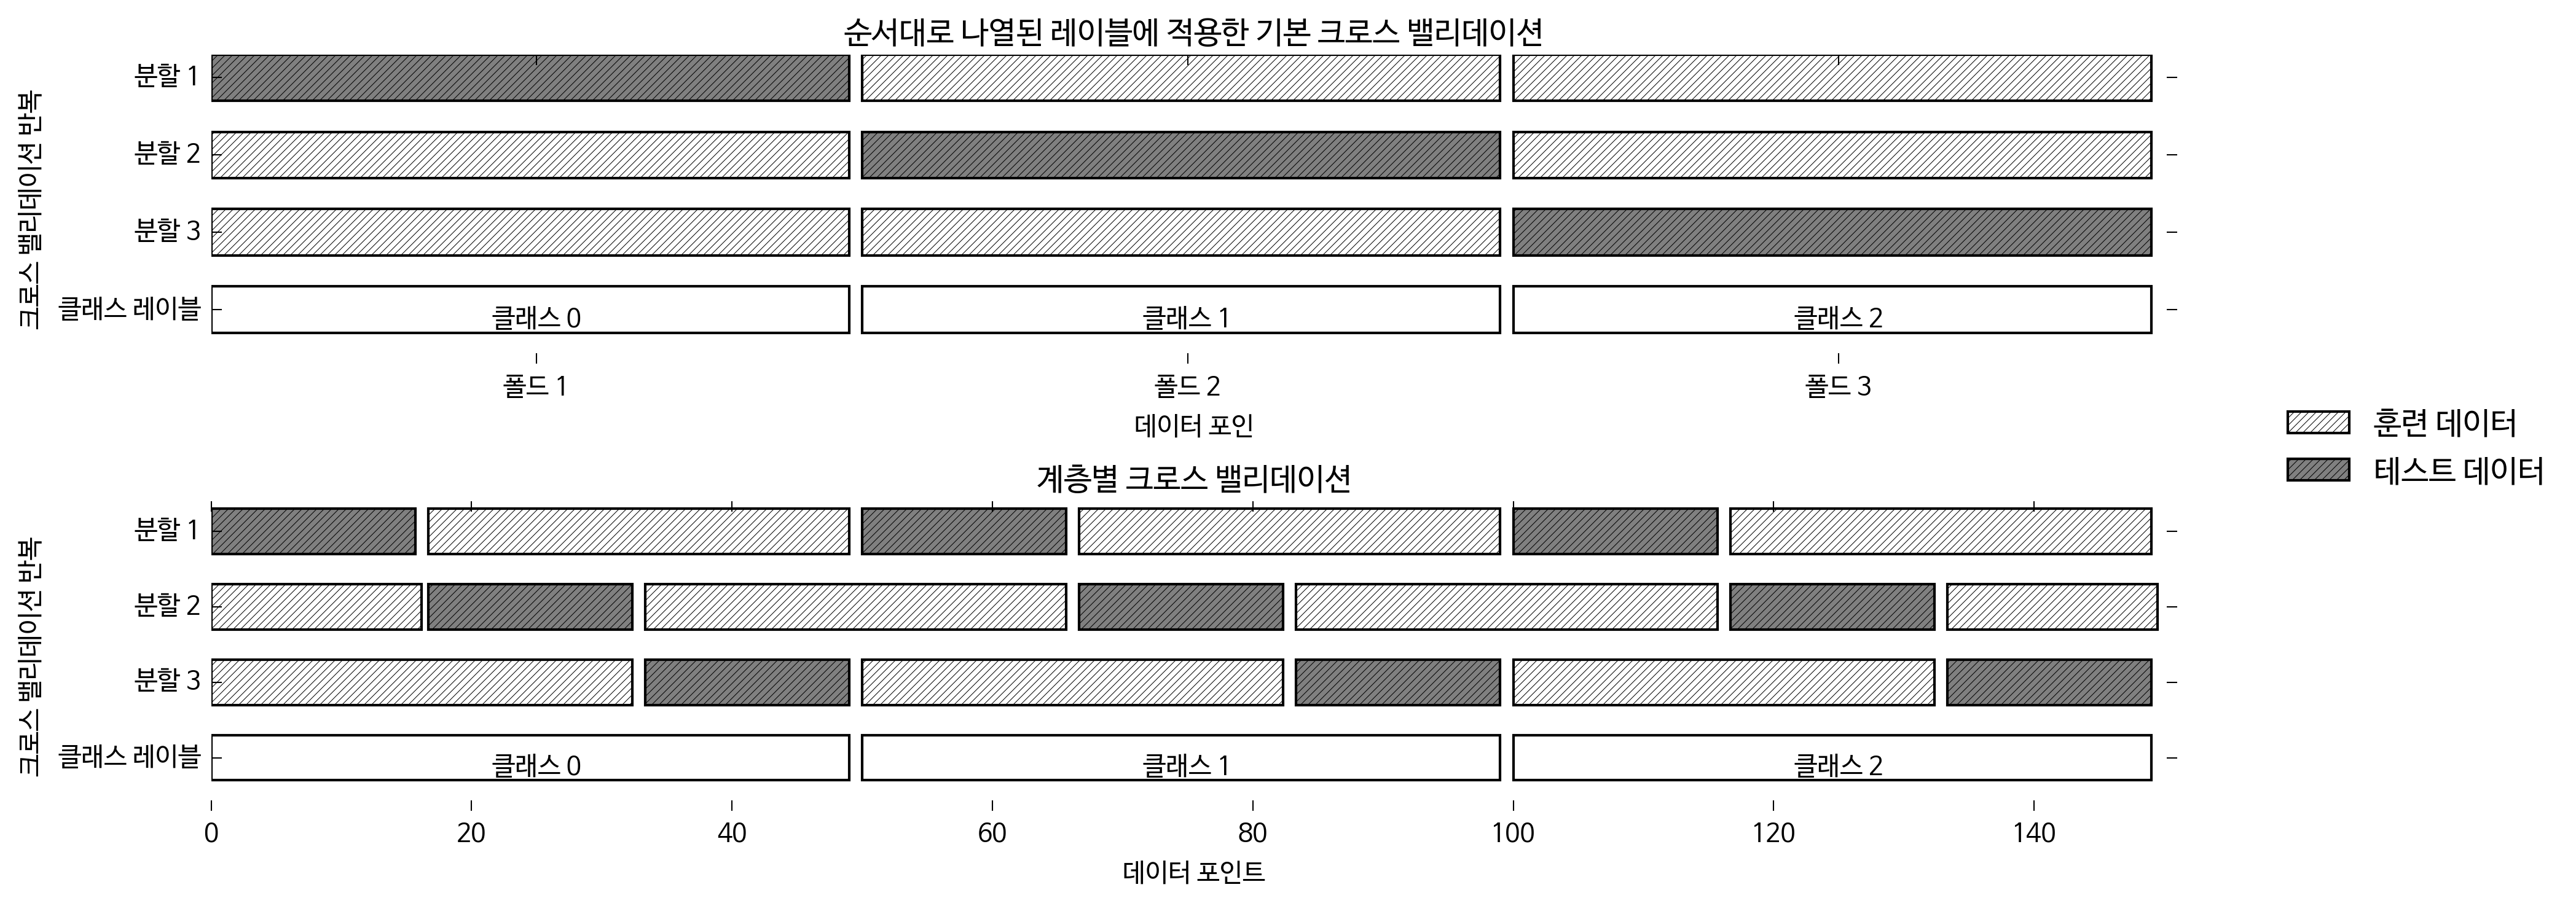

In [9]:
mglearn.plots.plot_stratified_cross_validation()

### 크로스 밸리데이션 상세 옵션

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
print("크로스 밸리데이션 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

크로스 밸리데이션 점수:
[ 1.     0.933  0.433  0.967  0.433]


In [12]:
kfold = KFold(n_splits=3)
print("크로스 밸리데이션 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

크로스 밸리데이션 점수:
[ 0.  0.  0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("크로스 밸리데이션 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

크로스 밸리데이션 점수:
[ 0.9   0.96  0.96]


#### LOOCV(Leave-One-Out cross-validation)

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("크로스 밸리데이션 분할 회수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

크로스 밸리데이션 분할 회수:  150
평균 정확도: 0.95


#### 무작위 분할 크로스 밸리데이션

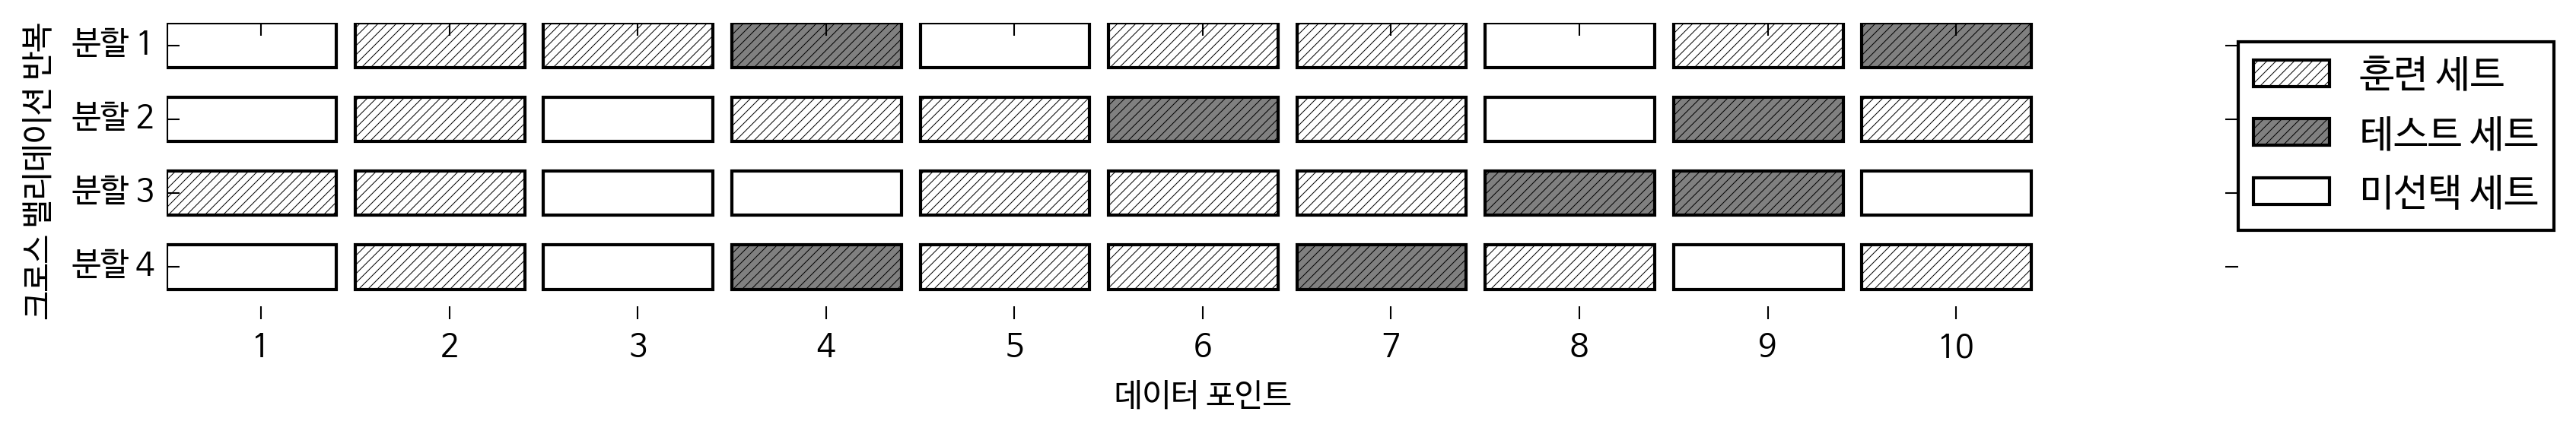

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("크로스 밸리데이션 점수:\n{}".format(scores))

크로스 밸리데이션 점수:
[ 0.973  0.973  0.947  0.987  0.893  0.867  0.933  0.813  0.92   0.92 ]


#### 그룹별 크로스 밸리데이션

In [17]:
from sklearn.model_selection import GroupKFold
# 인공 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세개의 샘플은 같은 그룹에 속하고
# 다음은 네개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("크로스 밸리데이션 점수:\n{}".format(scores))

크로스 밸리데이션 점수:
[ 0.75   0.8    0.667]


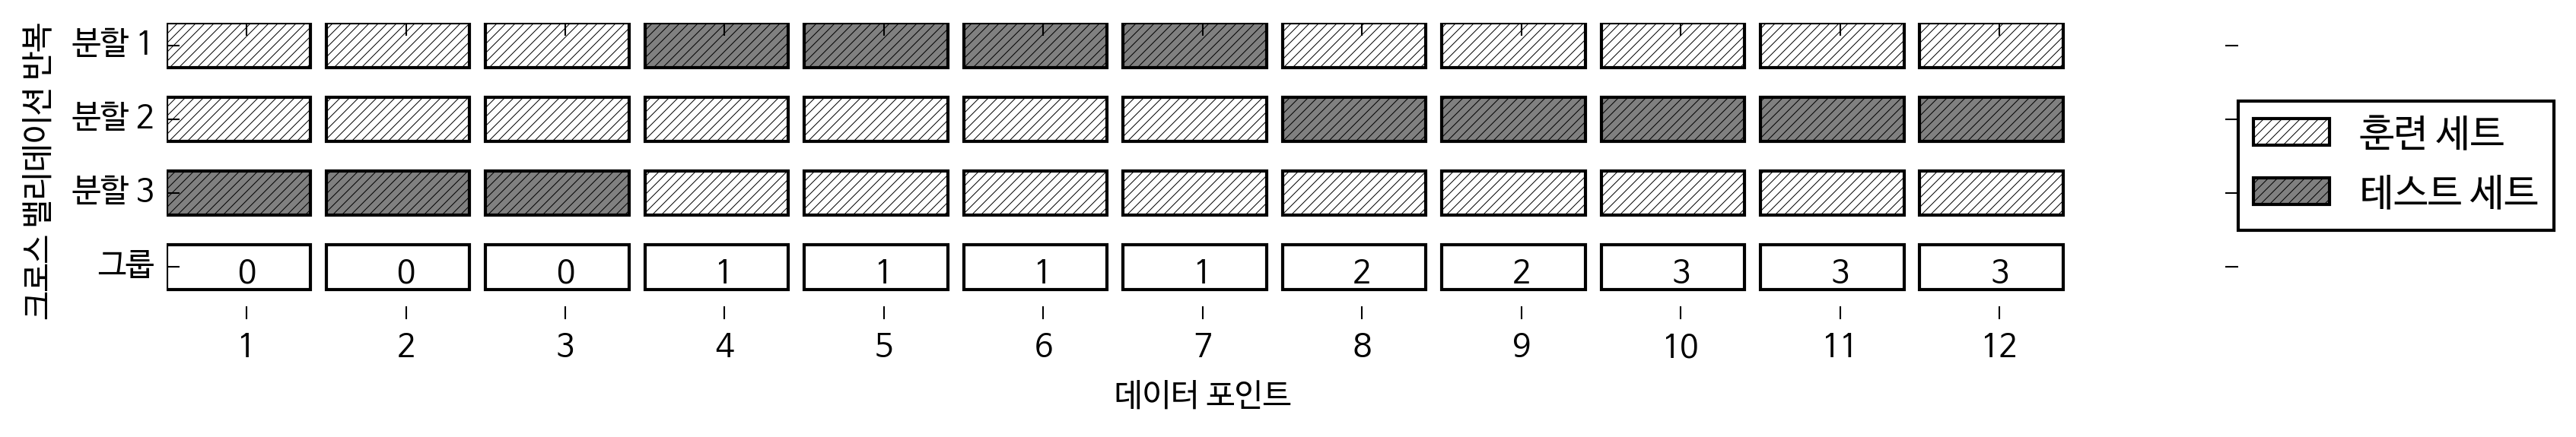

In [18]:
mglearn.plots.plot_group_kfold()

### 그리드 서치(Grid Search)

#### 간단한 그리드 서치

In [19]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 파라미터의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 파라미터와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'gamma': 0.001, 'C': 100}


#### 파라미터 오버피팅의 위험과 검증 세트

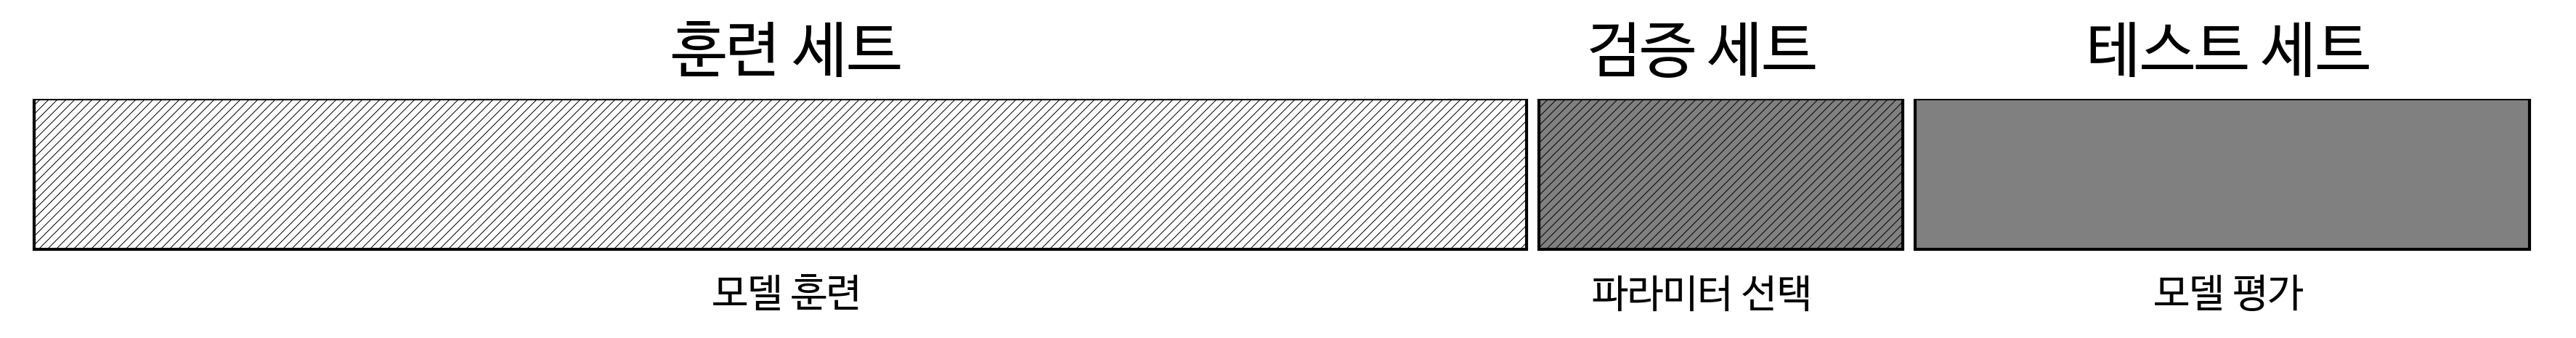

In [20]:
mglearn.plots.plot_threefold_split()

In [21]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 파라미터의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 파라미터와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'gamma': 0.001, 'C': 10}
최적 파라미터에서 테스트 세트 점수: 0.92


#### 크로스 밸리데이션을 사용한 그리드 서치

In [22]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 파라미터의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 크로스 밸리데이션을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 크로스 밸리데이션 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 파라미터와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

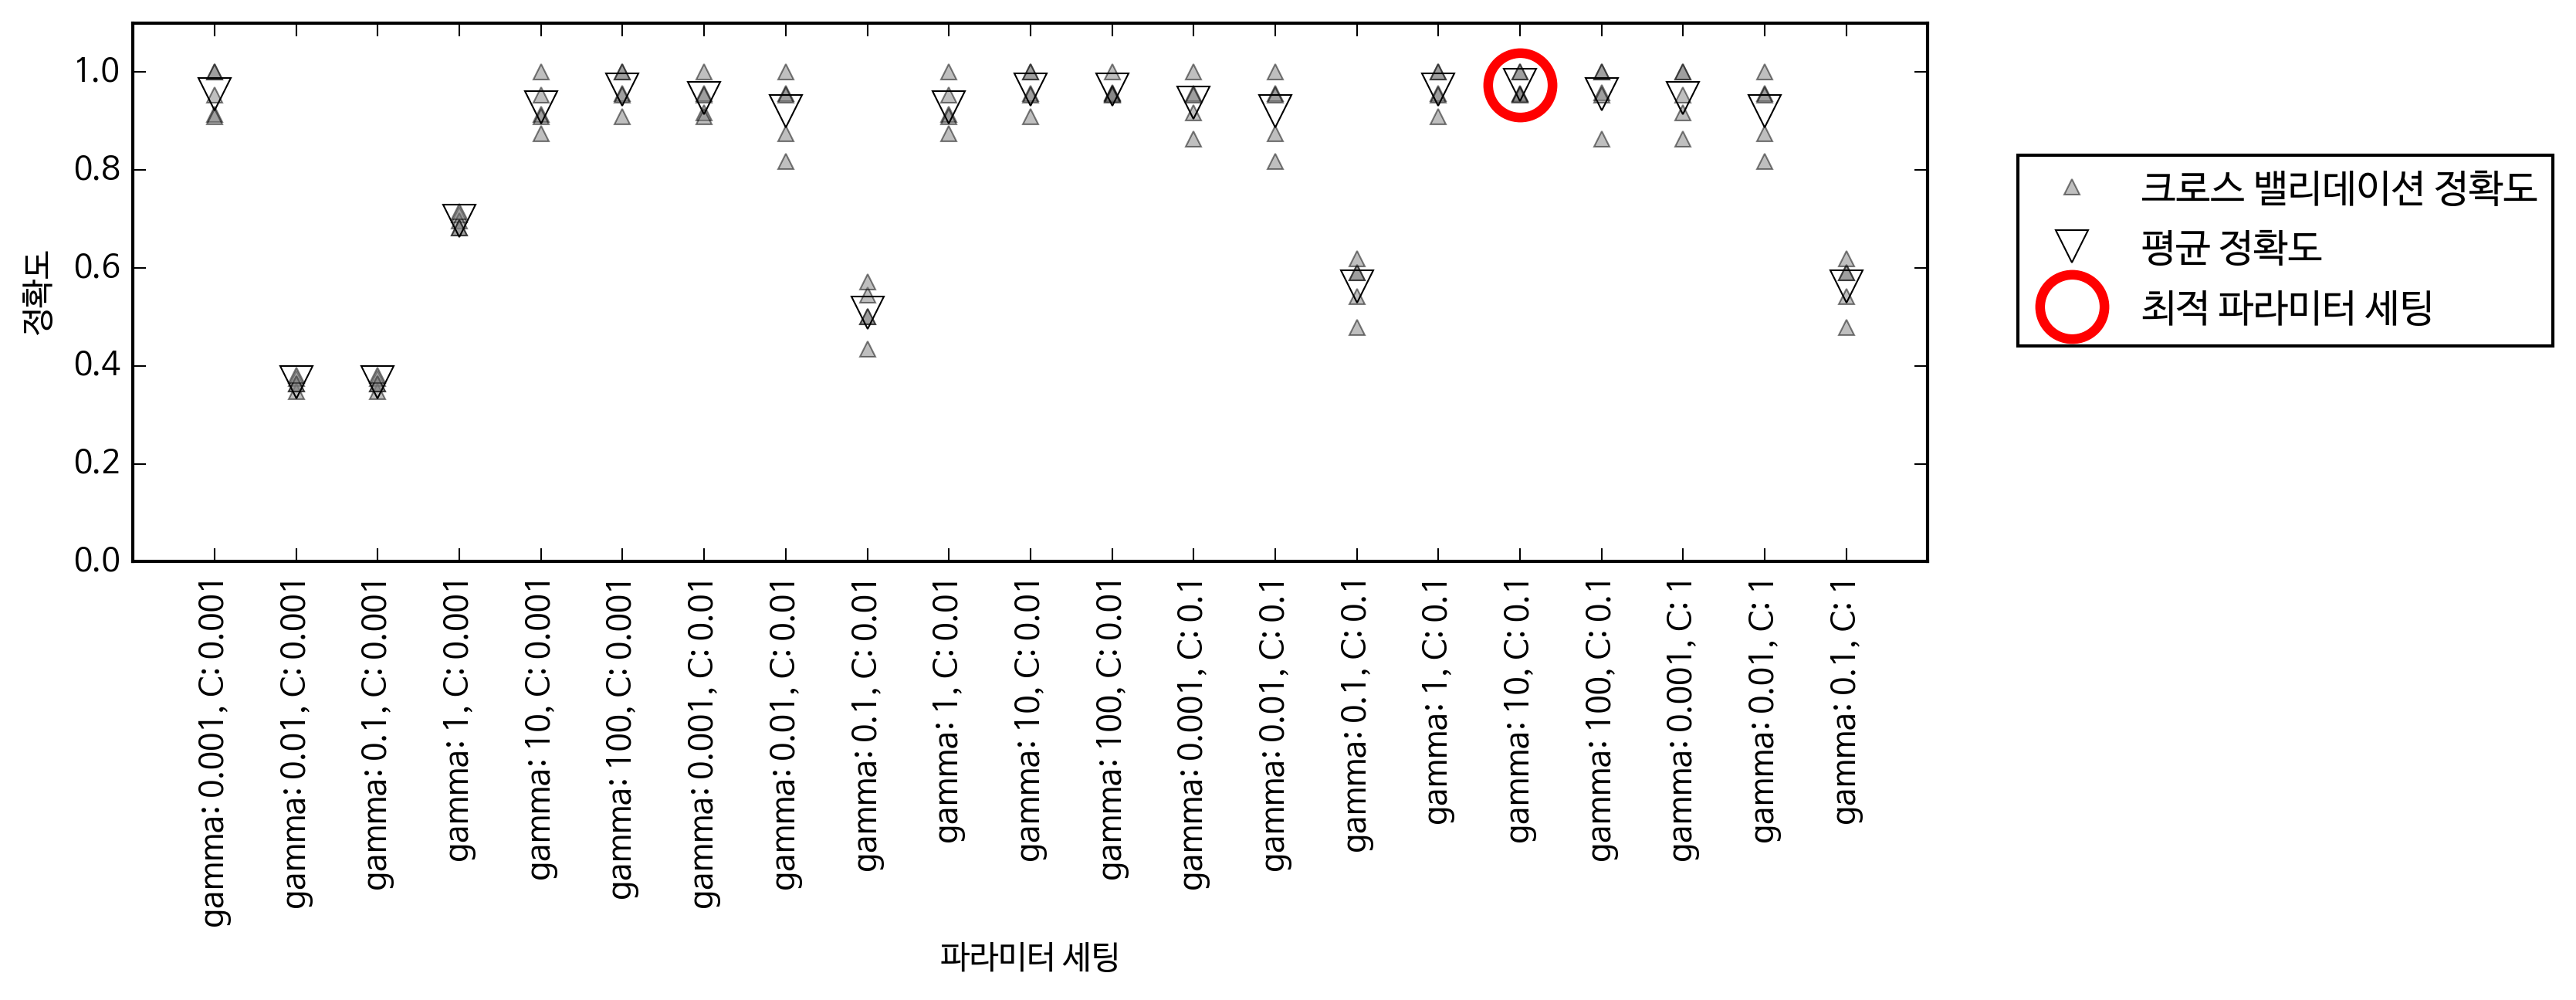

In [23]:
mglearn.plots.plot_cross_val_selection()

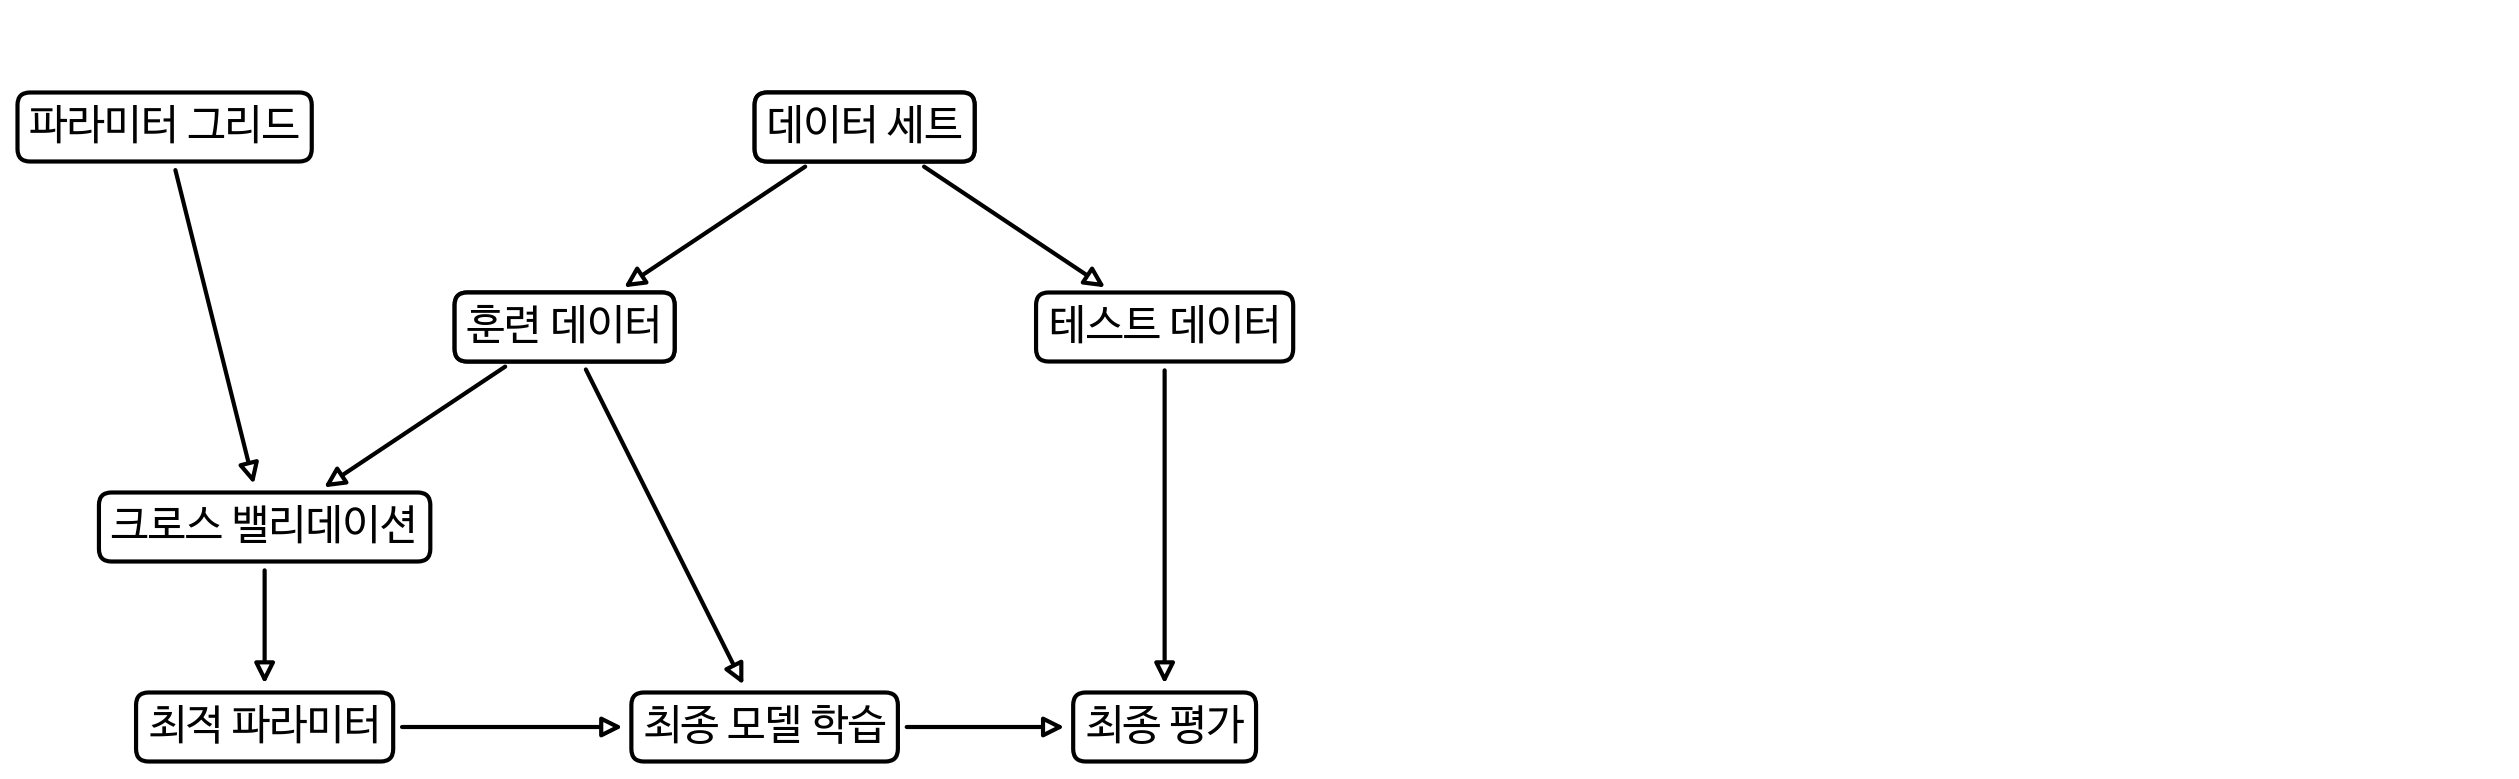

In [24]:
mglearn.plots.plot_grid_search_overview()

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("파라미터 그리드:\n{}".format(param_grid))

파라미터 그리드:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [30]:
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 크로스 밸리데이션 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'gamma': 0.01, 'C': 100}
최고 크로스 밸리데이션 점수: 0.97


In [31]:
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

최고 성능 모델:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### 크로스 밸리데이션 결과 분석

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00055,0.0005,0.00051,0.00062,0.00062
mean_score_time,0.00021,0.00022,0.00019,0.00023,0.00025
mean_test_score,0.37,0.37,0.37,0.37,0.37
mean_train_score,0.37,0.37,0.37,0.37,0.37
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'gamma': 0.001, 'C': 0.001}","{'gamma': 0.01, 'C': 0.001}","{'gamma': 0.1, 'C': 0.001}","{'gamma': 1, 'C': 0.001}","{'gamma': 10, 'C': 0.001}"
rank_test_score,22,22,22,22,22
split0_test_score,0.38,0.38,0.38,0.38,0.38
split0_train_score,0.36,0.36,0.36,0.36,0.36


0     0.37
1     0.37
2     0.37
3     0.37
4     0.37
5     0.37
6     0.37
7     0.37
8     0.37
9     0.37
10    0.37
11    0.37
12    0.37
13    0.70
14    0.92
15    0.96
16    0.37
17    0.37
18    0.70
19    0.93
20    0.96
21    0.95
22    0.92
23    0.51
24    0.93
25    0.96
26    0.96
27    0.94
28    0.92
29    0.56
30    0.96
31    0.97
32    0.96
33    0.95
34    0.92
35    0.56
Name: mean_test_score, dtype: float64
[[ 0.366  0.366  0.366  0.366  0.366  0.366]
 [ 0.366  0.366  0.366  0.366  0.366  0.366]
 [ 0.366  0.696  0.92   0.955  0.366  0.366]
 [ 0.696  0.929  0.964  0.946  0.92   0.509]
 [ 0.929  0.964  0.964  0.938  0.92   0.562]
 [ 0.964  0.973  0.955  0.946  0.92   0.562]]


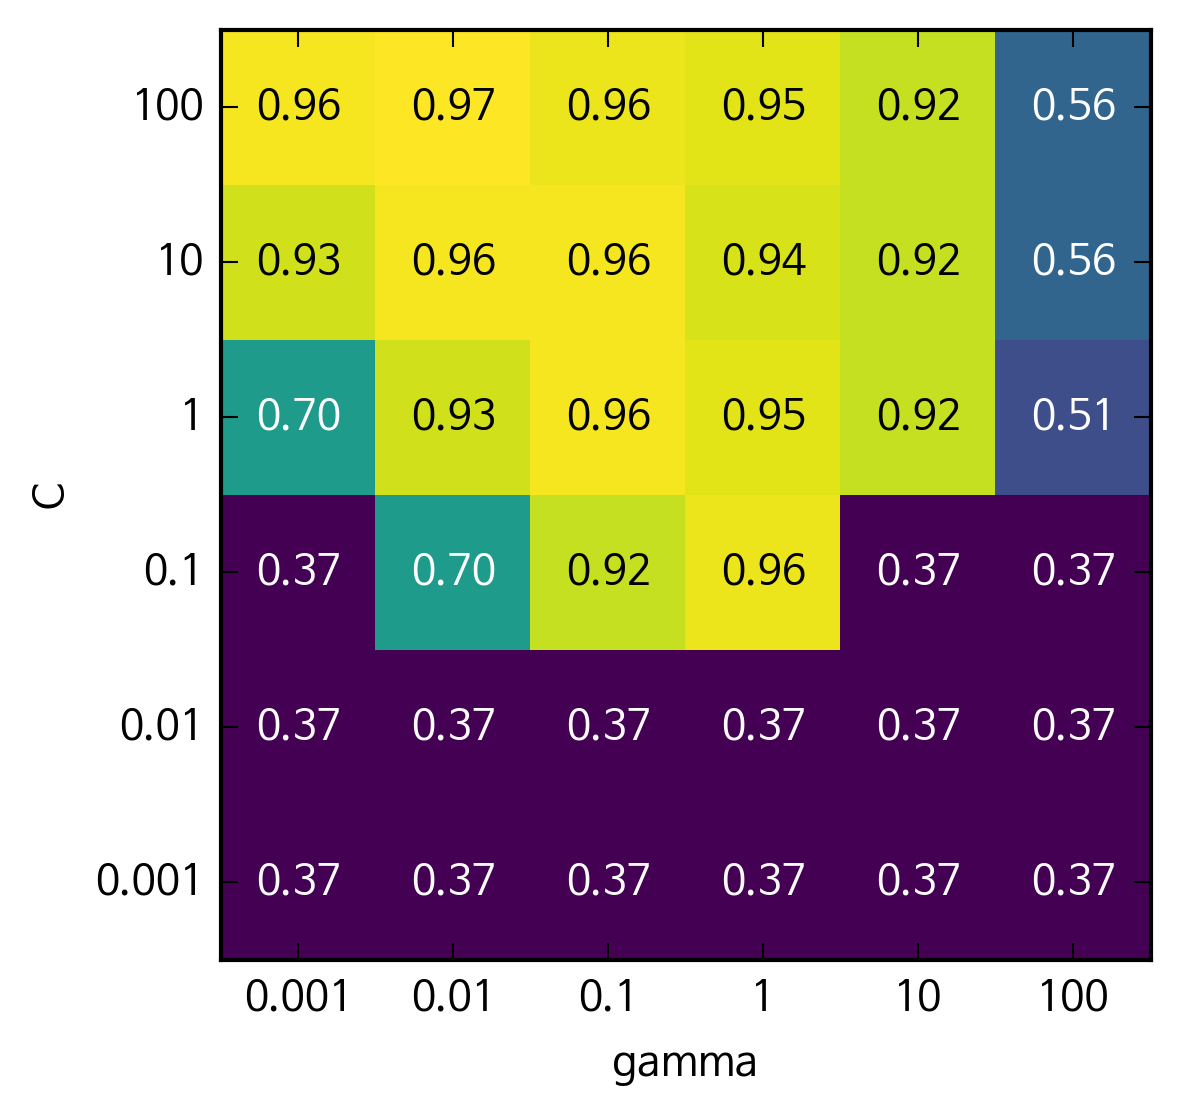

In [33]:
scores = np.array(results.mean_test_score).reshape(6, 6)
print(results.mean_test_score)
print(scores)
# 크로스 밸리데이션 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

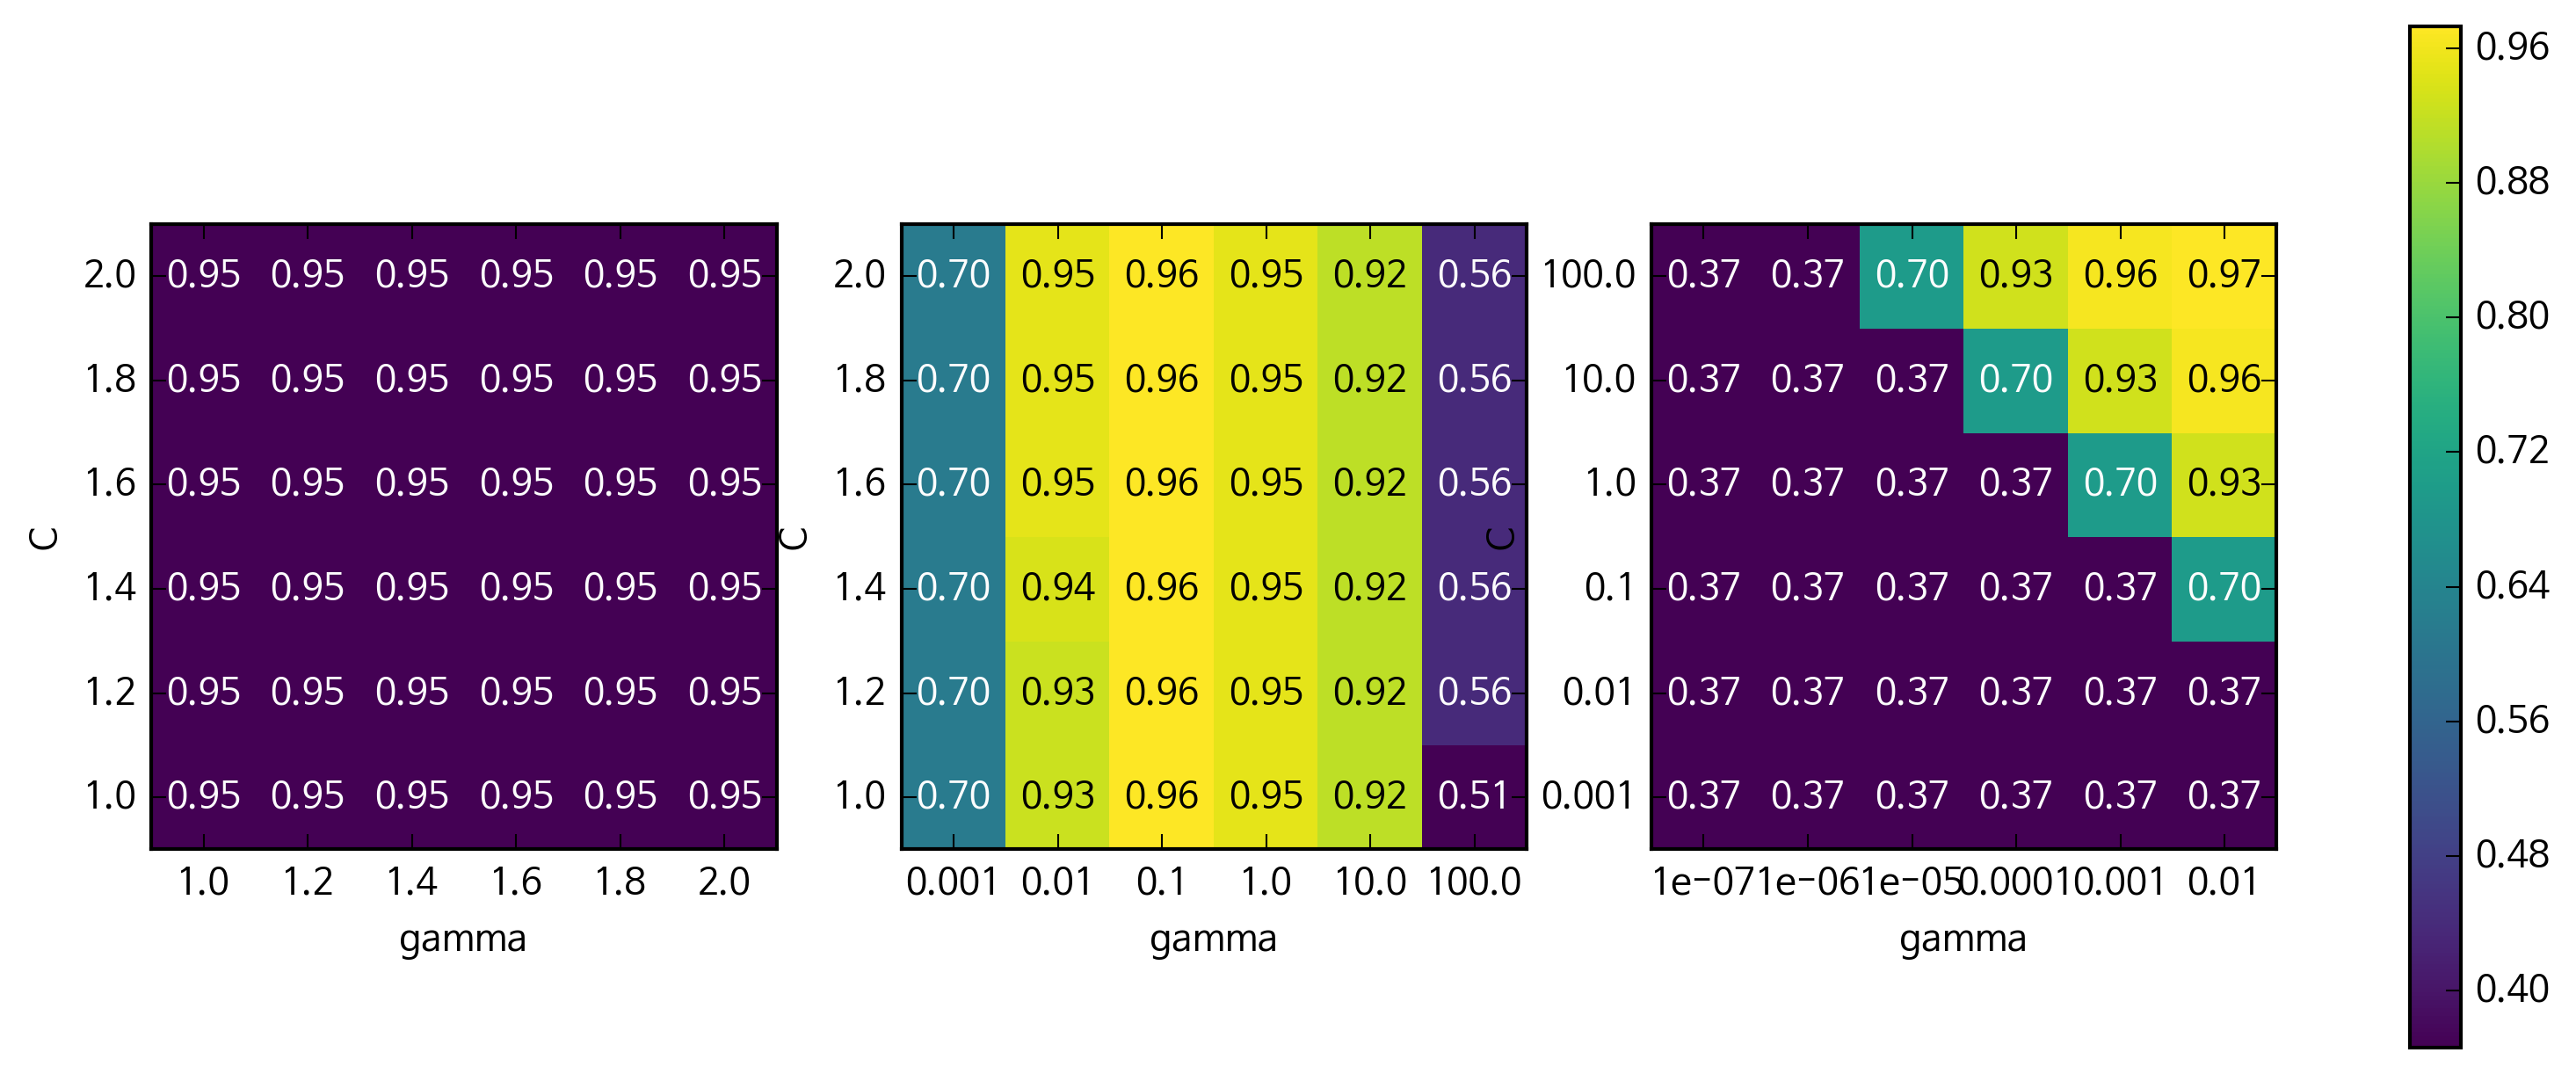

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 크로스 밸리데이션 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [35]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 크로스 밸리데이션 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
최고 크로스 밸리데이션 점수: 0.97


In [37]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00065,0.00053,0.0006,0.00055,0.00059,0.00053,0.0005,0.00048,0.00048,0.0005,0.00054,0.00059,0.00048,0.00051,0.00043,0.00049,0.00055,0.00062,0.00048,0.00049,0.00044,0.00042,0.00071,0.00068,0.00053,0.00031,0.00031,0.0004,0.00069,0.00071,0.00031,0.00032,0.0003,0.0006,0.00086,0.0007,0.00039,0.00035,0.00029,0.00028,0.00029,0.00029
mean_score_time,0.00027,0.00022,0.00024,0.00021,0.00022,0.00022,0.0002,0.00019,0.00019,0.0002,0.00022,0.00022,0.00019,0.00021,0.00019,0.0002,0.0002,0.0002,0.00019,0.00024,0.00024,0.00018,0.0002,0.00021,0.00025,0.00017,0.00018,0.00018,0.00019,0.0002,0.00017,0.00017,0.00017,0.00023,0.00023,0.00021,0.00018,0.00017,0.00016,0.00016,0.0003,0.00016
mean_test_score,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.7,0.92,0.96,0.37,0.37,0.7,0.93,0.96,0.95,0.92,0.51,0.93,0.96,0.96,0.94,0.92,0.56,0.96,0.97,0.96,0.95,0.92,0.56,0.37,0.85,0.95,0.97,0.96,0.96
mean_train_score,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.7,0.92,0.96,0.38,0.37,0.7,0.94,0.98,0.98,1,1,0.94,0.98,0.99,0.99,1,1,0.98,0.98,0.99,1,1,1,0.37,0.86,0.97,0.98,0.99,0.99
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}","{'kernel': 'rbf', 'gamma': 1, 'C': 1}","{'kernel': 'rbf', 'gamma': 10, 'C': 1}","{'kernel': 'rbf', 'gamma': 100, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}","{'kernel': 'rbf', 'gamma': 1, 'C': 10}","{'kernel': 'rbf', 'gamma': 10, 'C': 10}","{'kernel': 'rbf', 'gamma': 100, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}","{'kernel': 'rbf', 'gamma': 1, 'C': 100}","{'kernel': 'rbf', 'gamma': 10, 'C': 100}","{'kernel': 'rbf', 'gamma': 100, 'C': 100}","{'kernel': 'linear', 'C': 0.001}","{'kernel': 'linear', 'C': 0.01}","{'kernel': 'linear', 'C': 0.1}","{'kernel': 'linear', 'C': 1}","{'kernel': 'linear', 'C': 10}","{'kernel': 'linear', 'C': 100}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,27,27,27,22,17,9,27,27,22,15,3,11,17,26,15,3,3,14,17,24,3,1,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.71,0.92,1,0.38,0.38,0.71,0.88,1,0.92,0.88,0.5,0.88,1,0.96,0.92,0.88,0.54,1,1,0.96,0.92,0.88,0.54,0.38,0.92,0.96,1,0.96,0.96


#### 그리드 서치에 다른 크로스 밸리데이션 전략 사용하기

#### 중첩 크로스 밸리데이션

In [38]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("크로스 밸리데이션 점수: ", scores)
print("크로스 밸리데이션 평균 점수: ", scores.mean())
print(param_grid)

크로스 밸리데이션 점수:  [ 0.967  1.     0.9    0.967  1.   ]
크로스 밸리데이션 평균 점수:  0.966666666667
[{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [39]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv 의 분할을 순회하는 for 루프
    # (split 메소드는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 파라미터를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 파라미터 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 크로스 밸리데이션의 점수를 기록합니다
            cv_scores = []
            # inner_cv 의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 파라미터로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 크로스 밸리데이션의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 파라미터와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [40]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("크로스 밸리데이션 점수: {}".format(scores))

크로스 밸리데이션 점수: [ 0.967  1.     0.967  0.967  1.   ]


#### 크로스 밸리데이션과 그리드 서치 병렬화

### 평가 지표 및 측정
#### 최종 목표를 기억하라

#### 이진 분류의 평가 지표
##### 에러의 종류
##### 불균형 데이터셋

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [42]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [44]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


##### 오차 행렬(Confusion matrices)

In [45]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


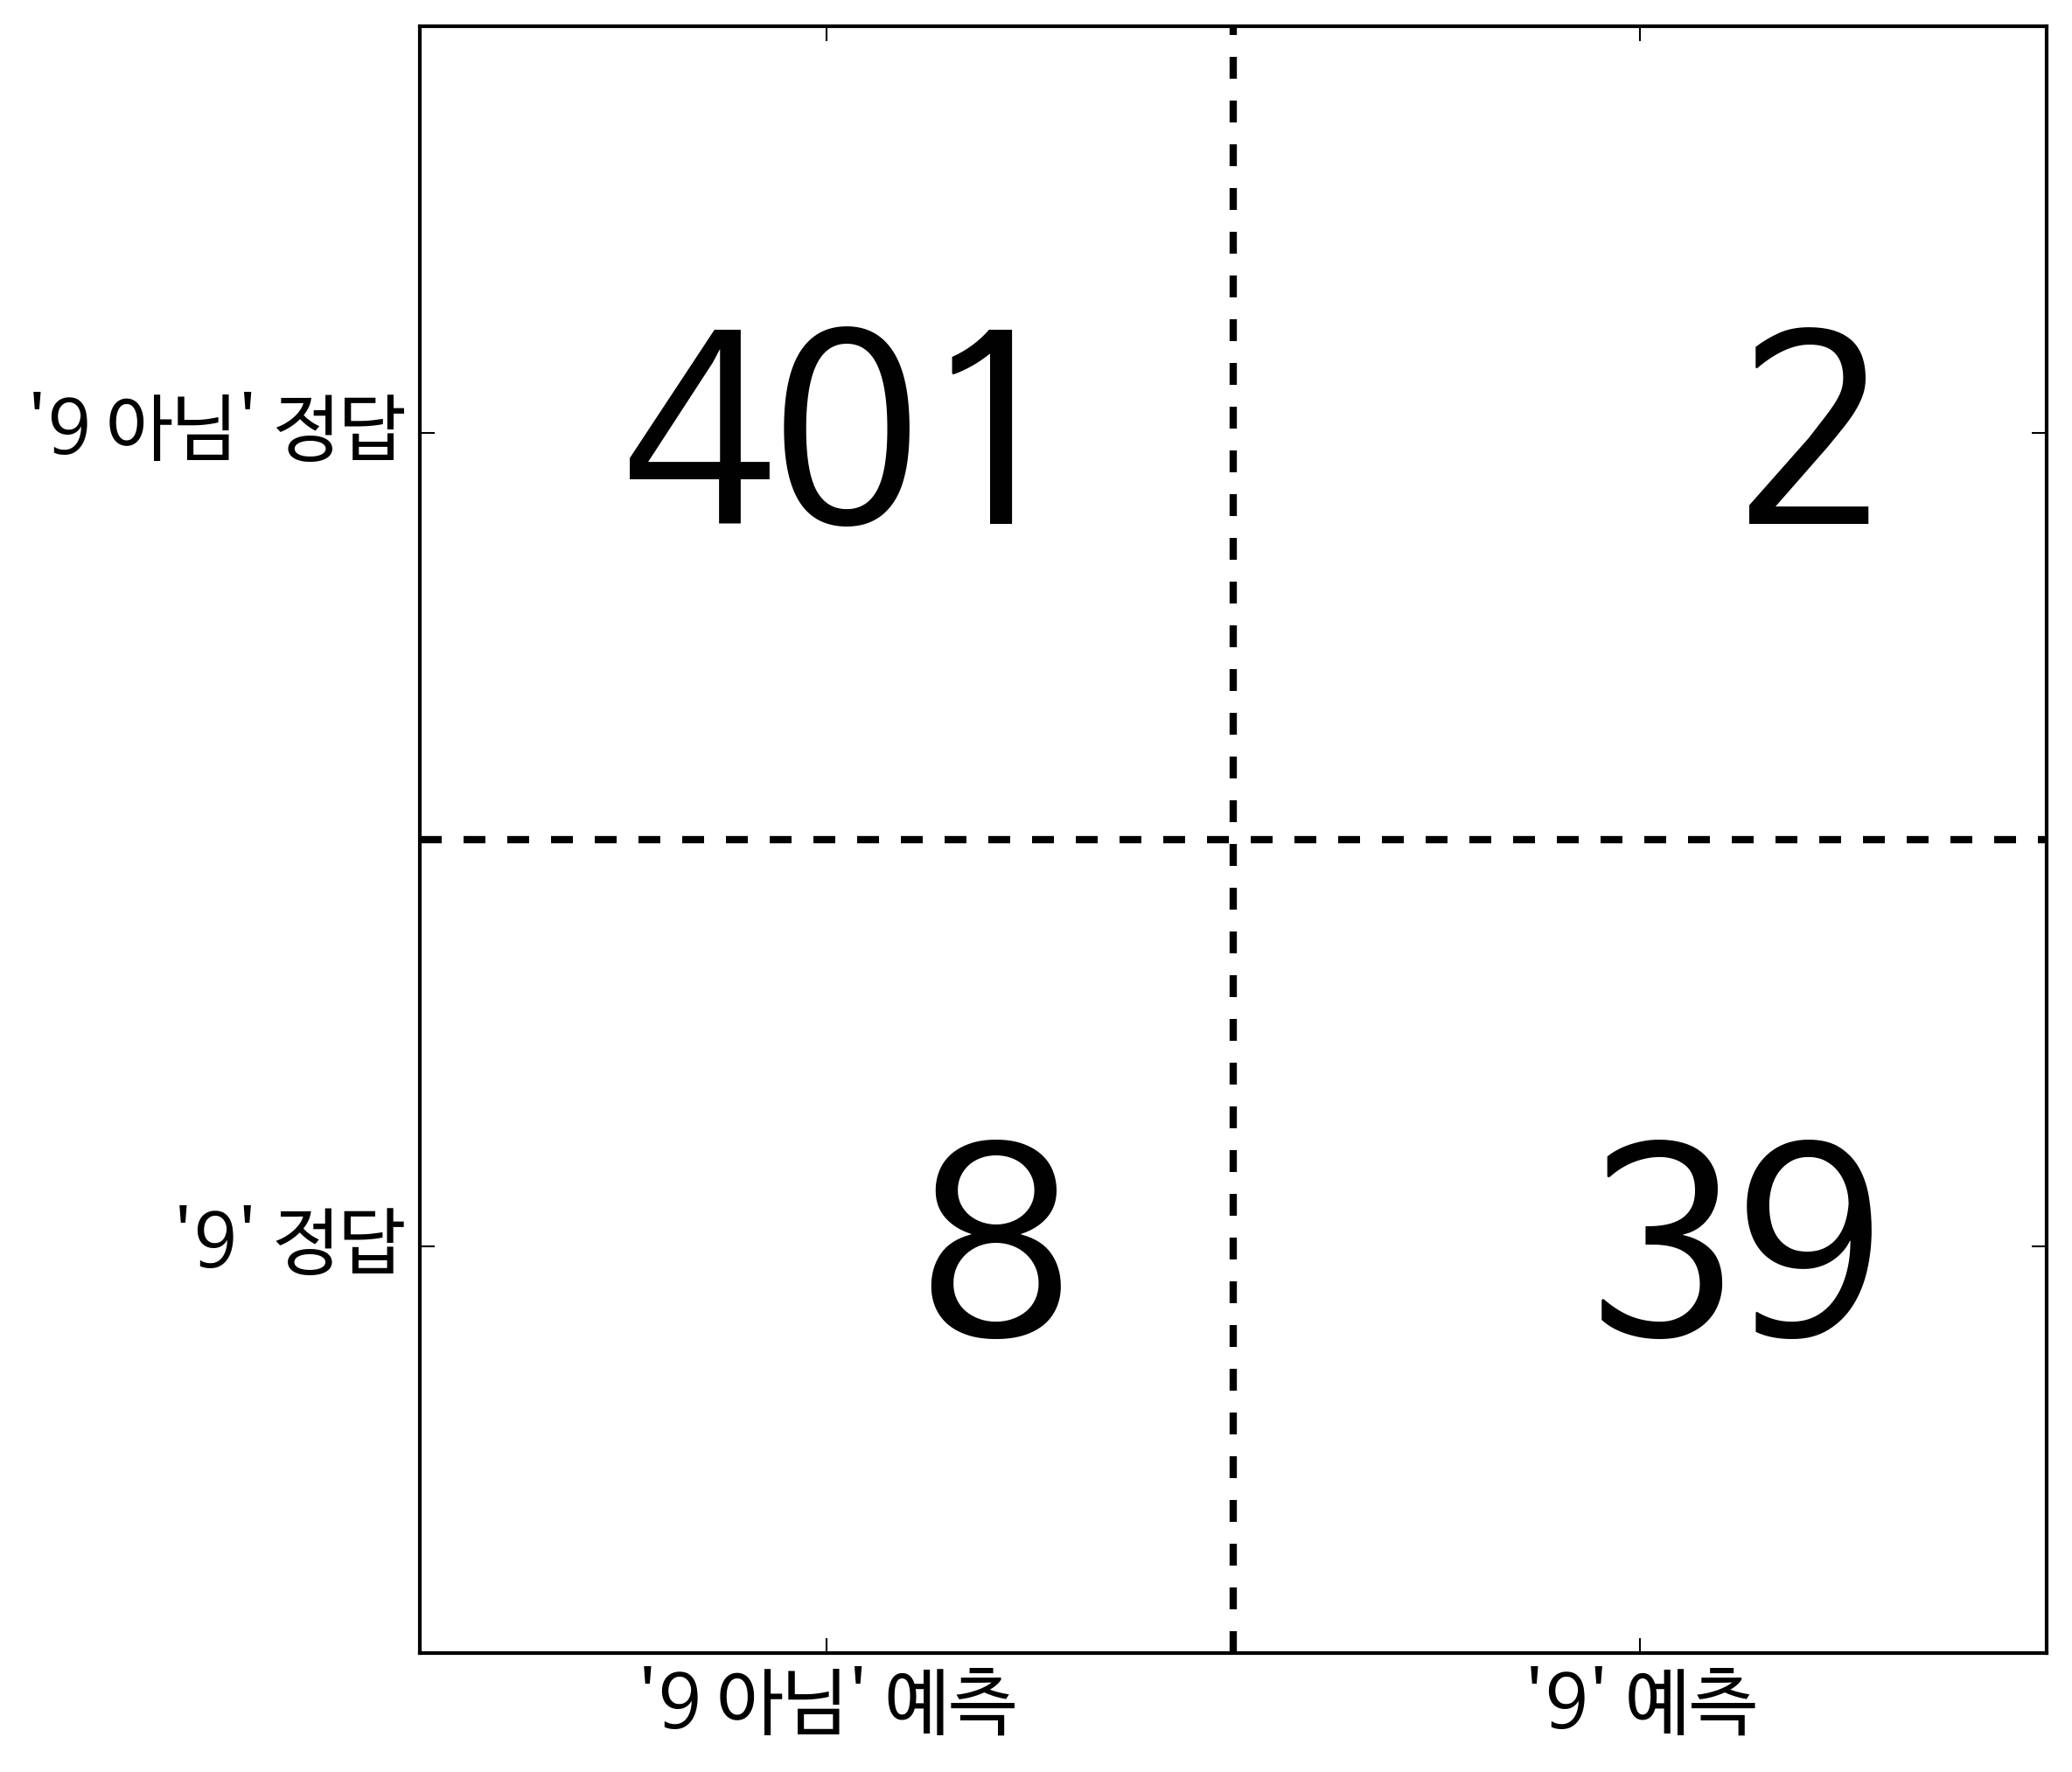

In [46]:
mglearn.plots.plot_confusion_matrix_illustration()

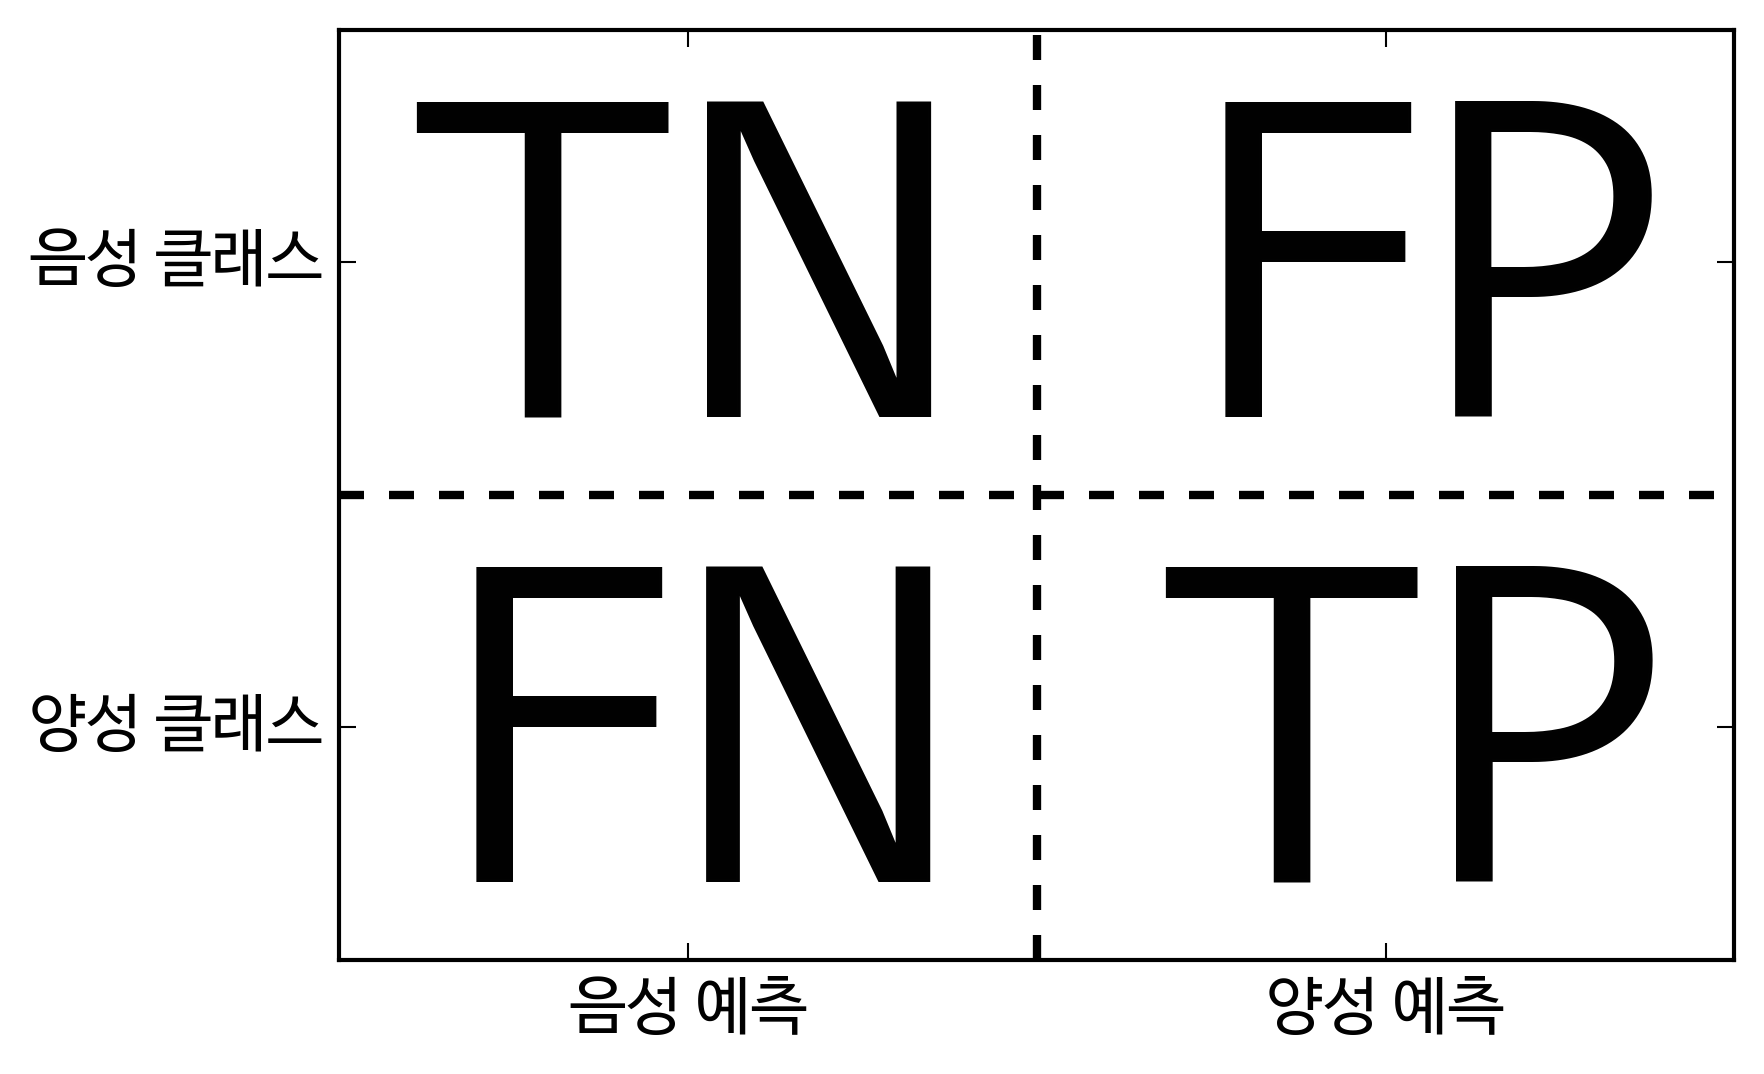

In [47]:
mglearn.plots.plot_binary_confusion_matrix()

In [48]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[370  33]
 [ 39   8]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


###### 정확도와의 관계
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### 정밀도, 재현율, f-점수
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [49]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.18
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


/Users/rickypark/anaconda/envs/introduction_to_ml_with_python/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/rickypark/anaconda/envs/introduction_to_ml_with_python/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.90      0.92      0.91       403
          9       0.20      0.17      0.18        47

avg / total       0.83      0.84      0.84       450



In [52]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



##### 불확실성 고려

In [53]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)                                     

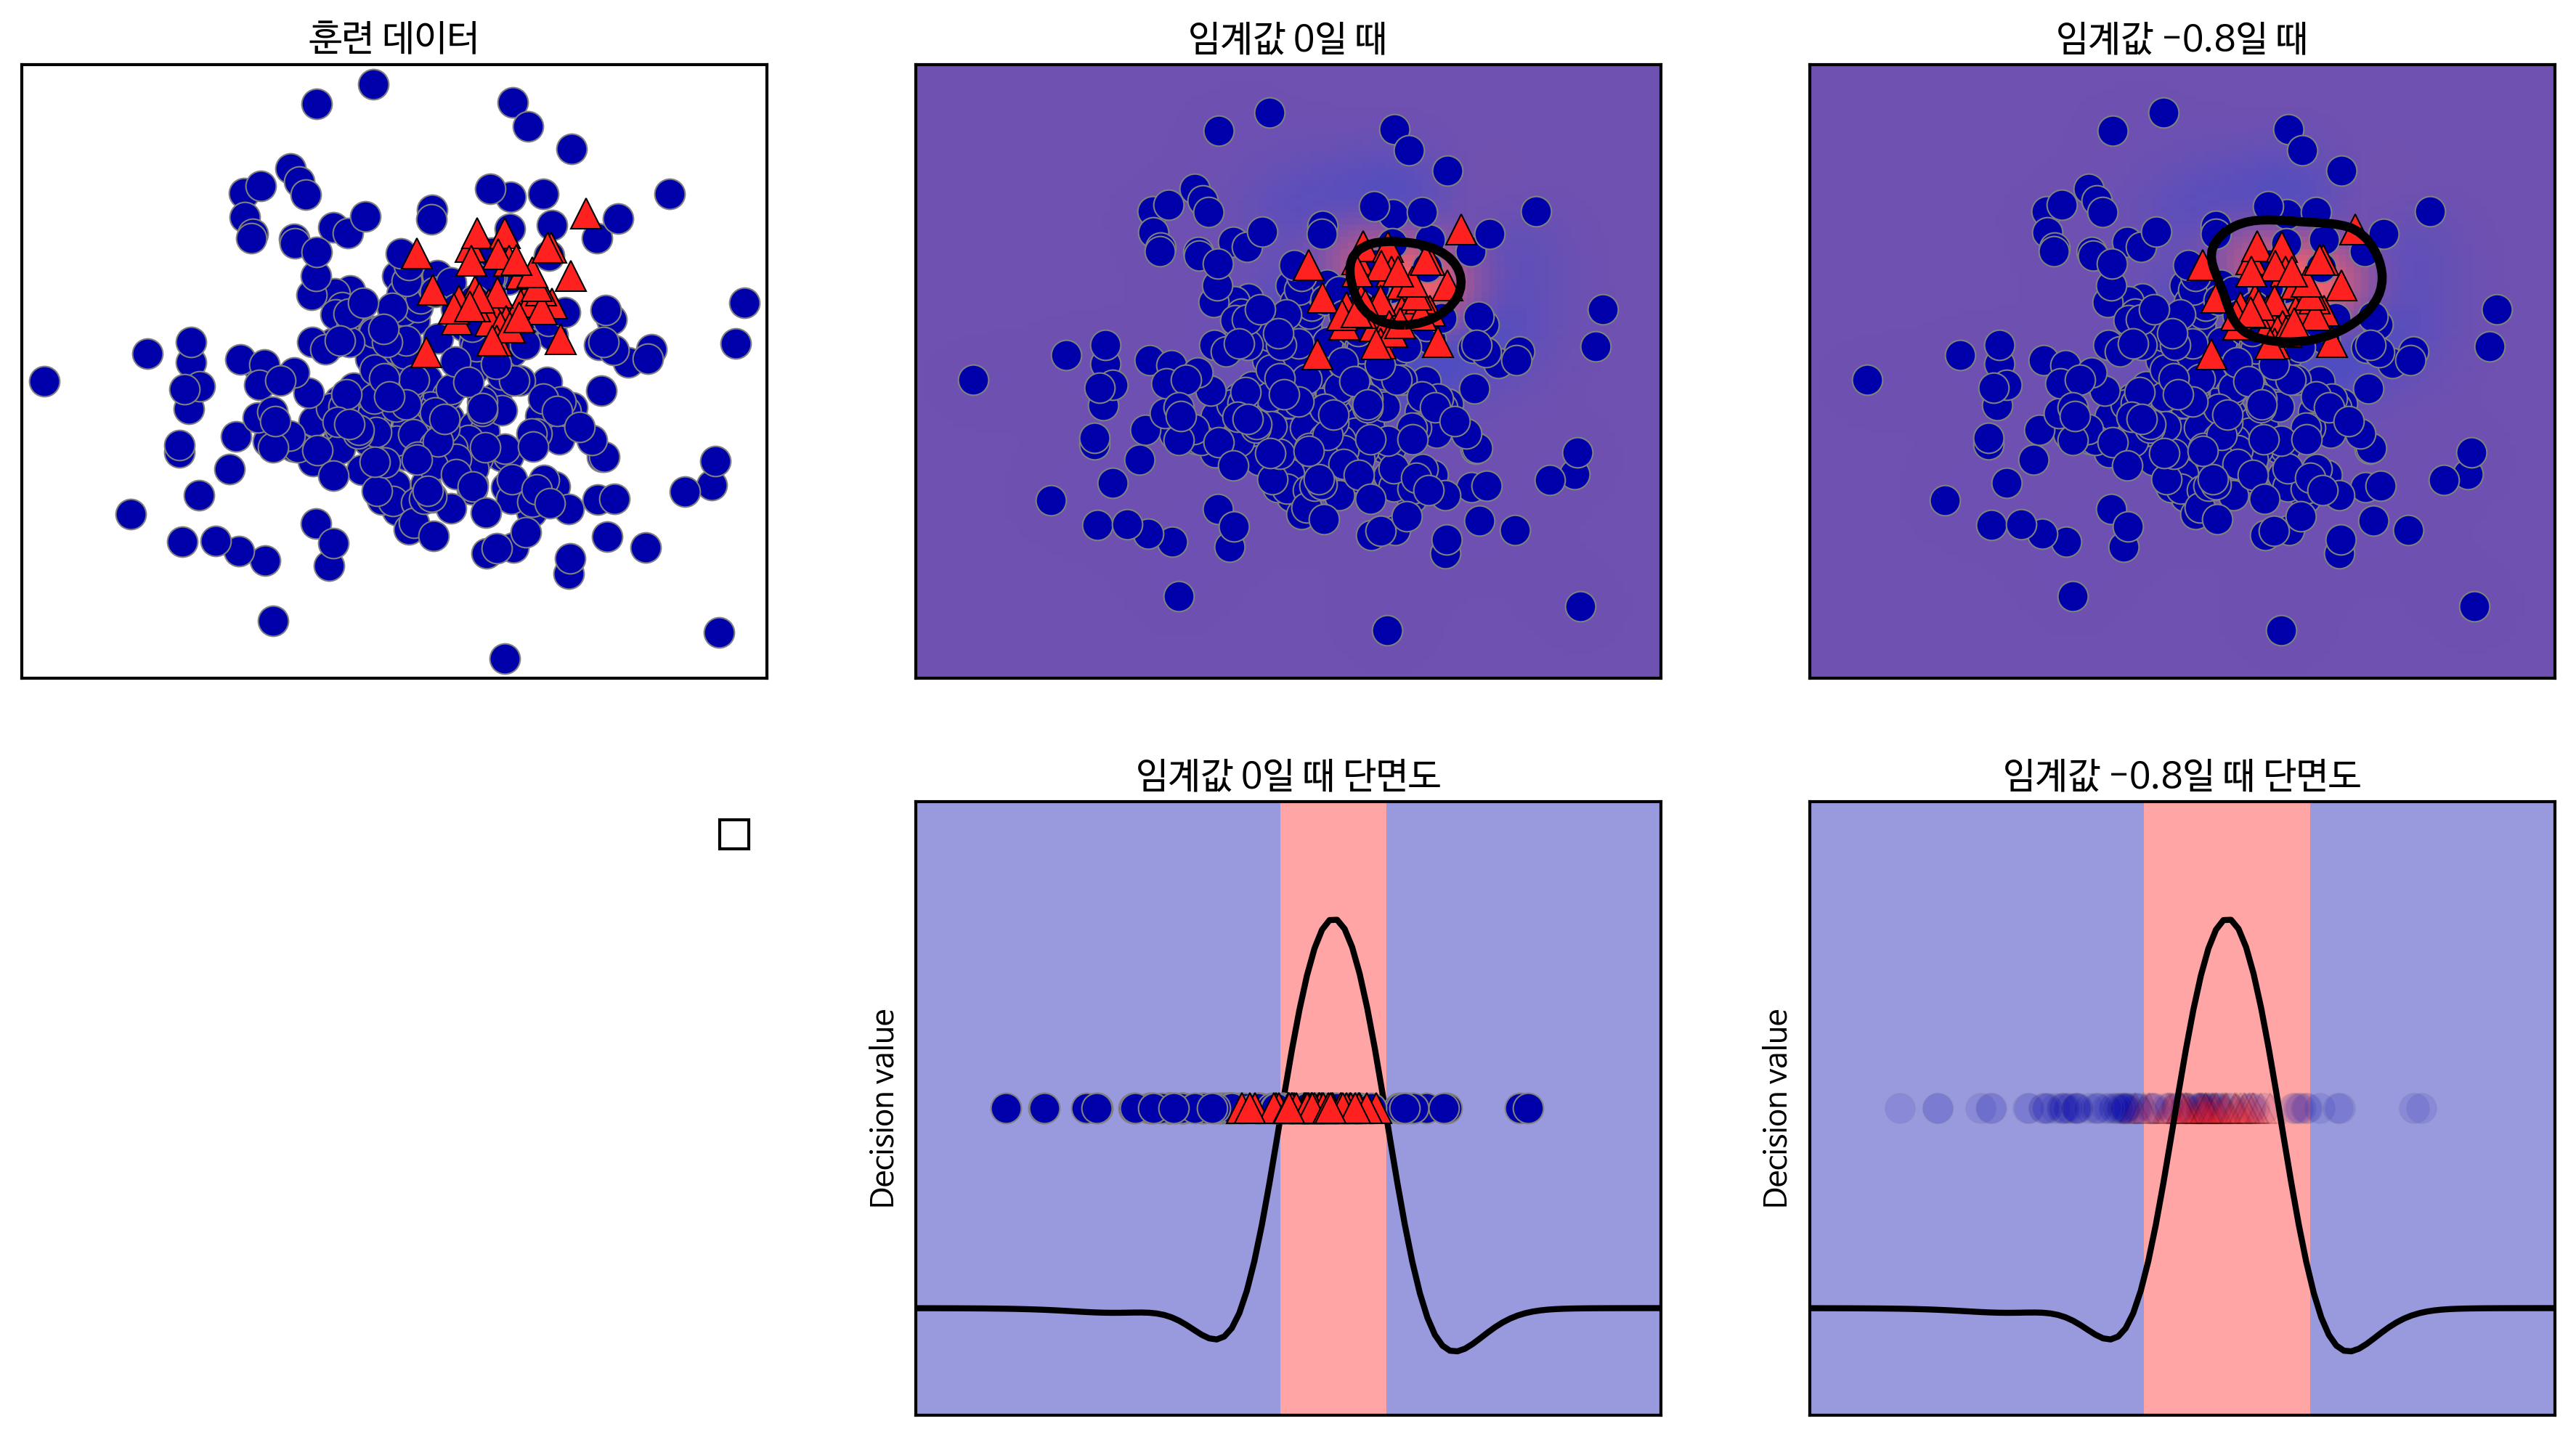

In [54]:
mglearn.plots.plot_decision_threshold()

In [55]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [56]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [57]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



##### 정밀도-재현율 곡선과 ROC 곡선

In [58]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

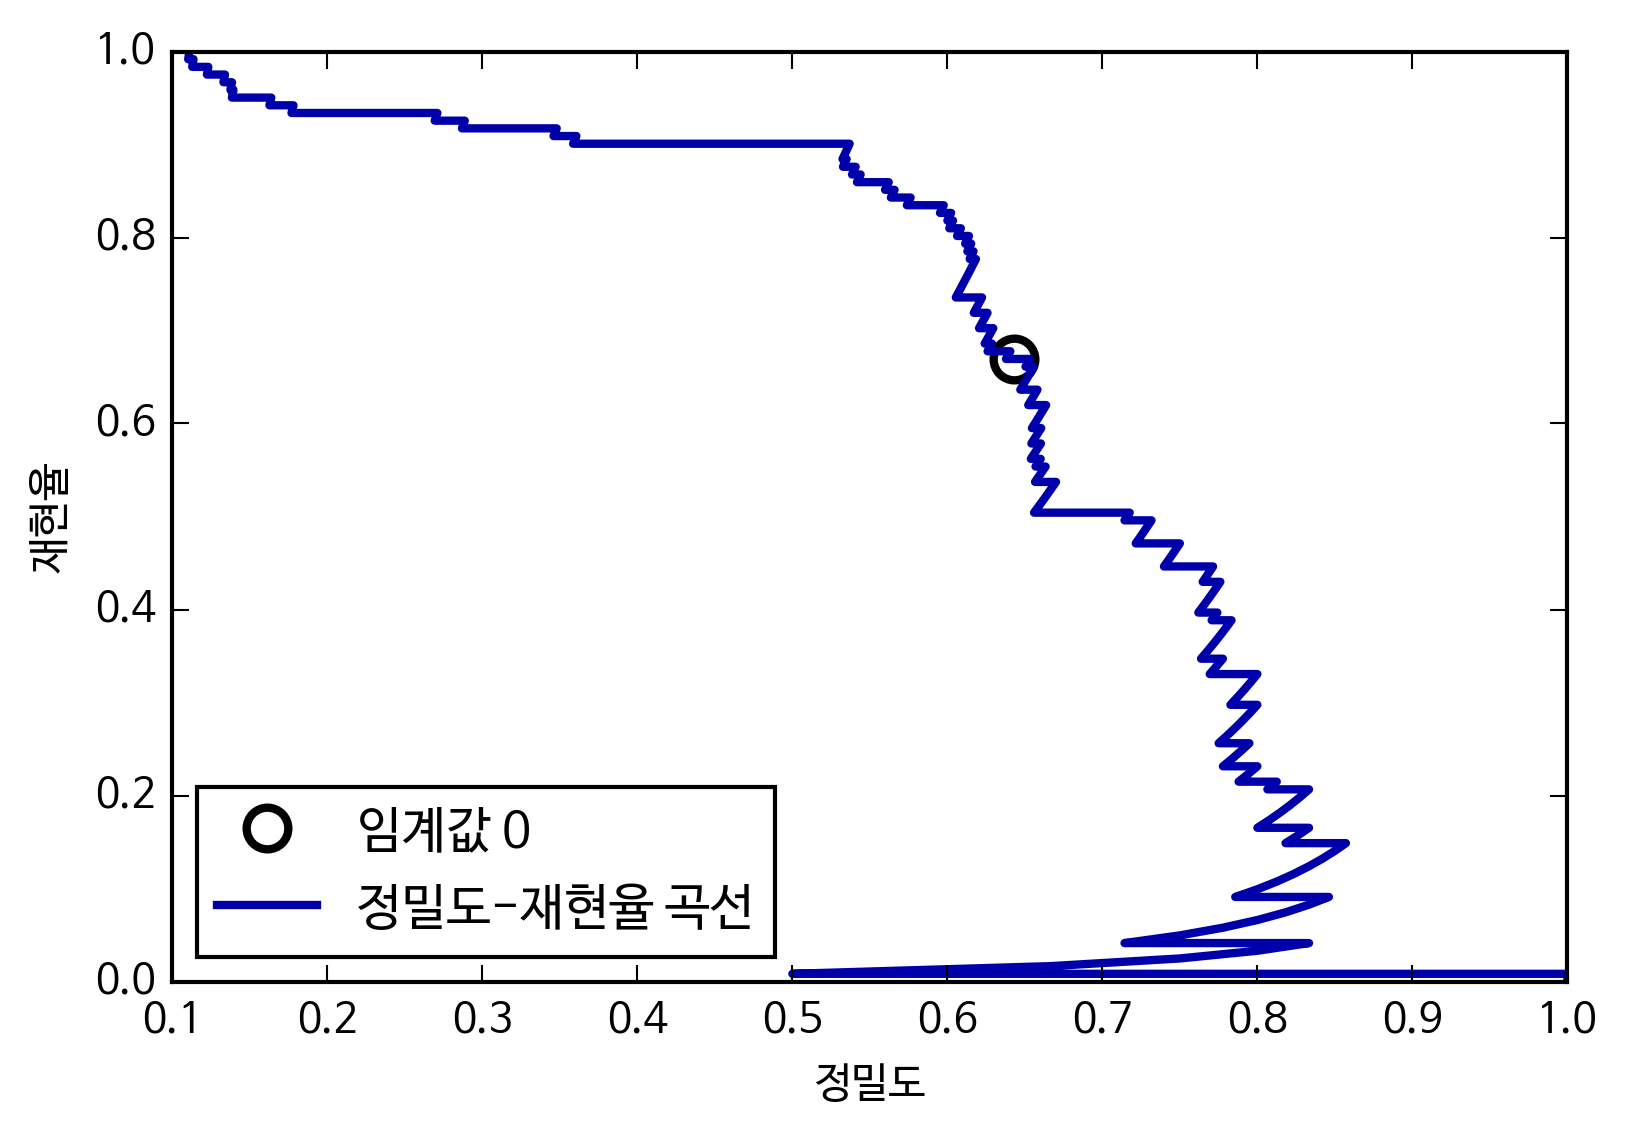

In [59]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

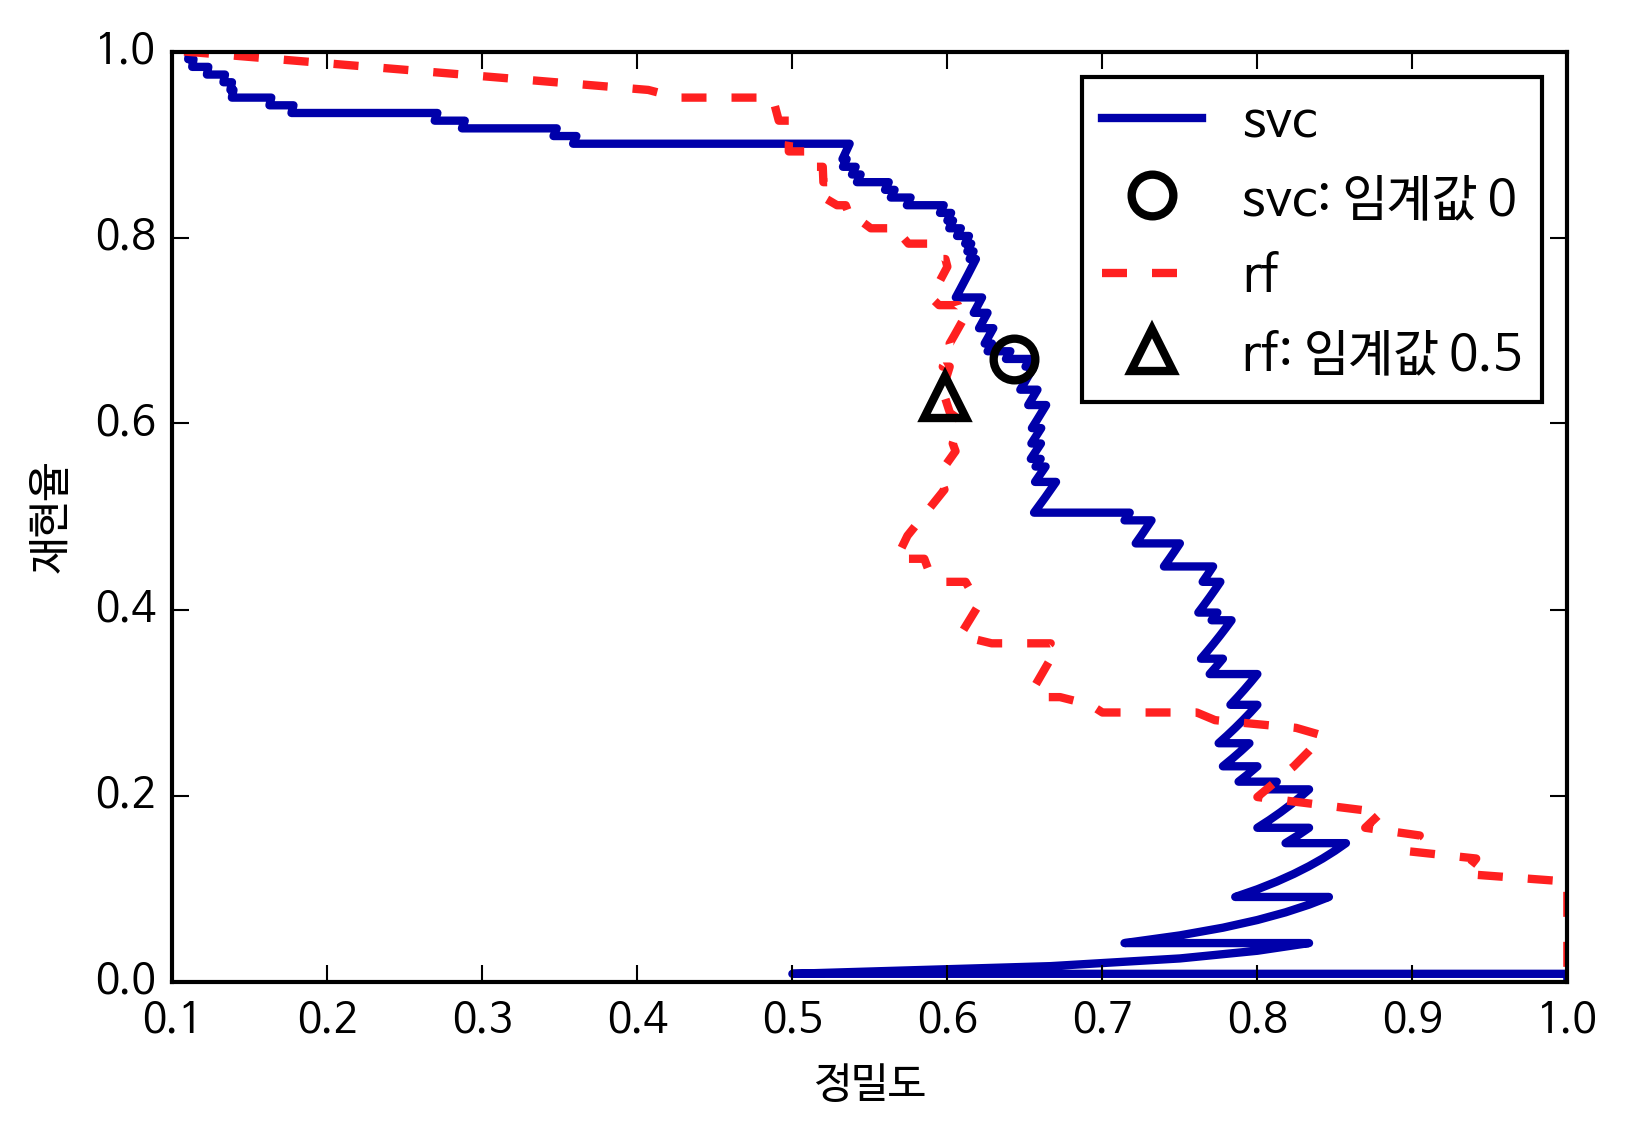

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [61]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
        f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [62]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.666
svc의 평균 정밀도: 0.663


##### ROC 와 AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

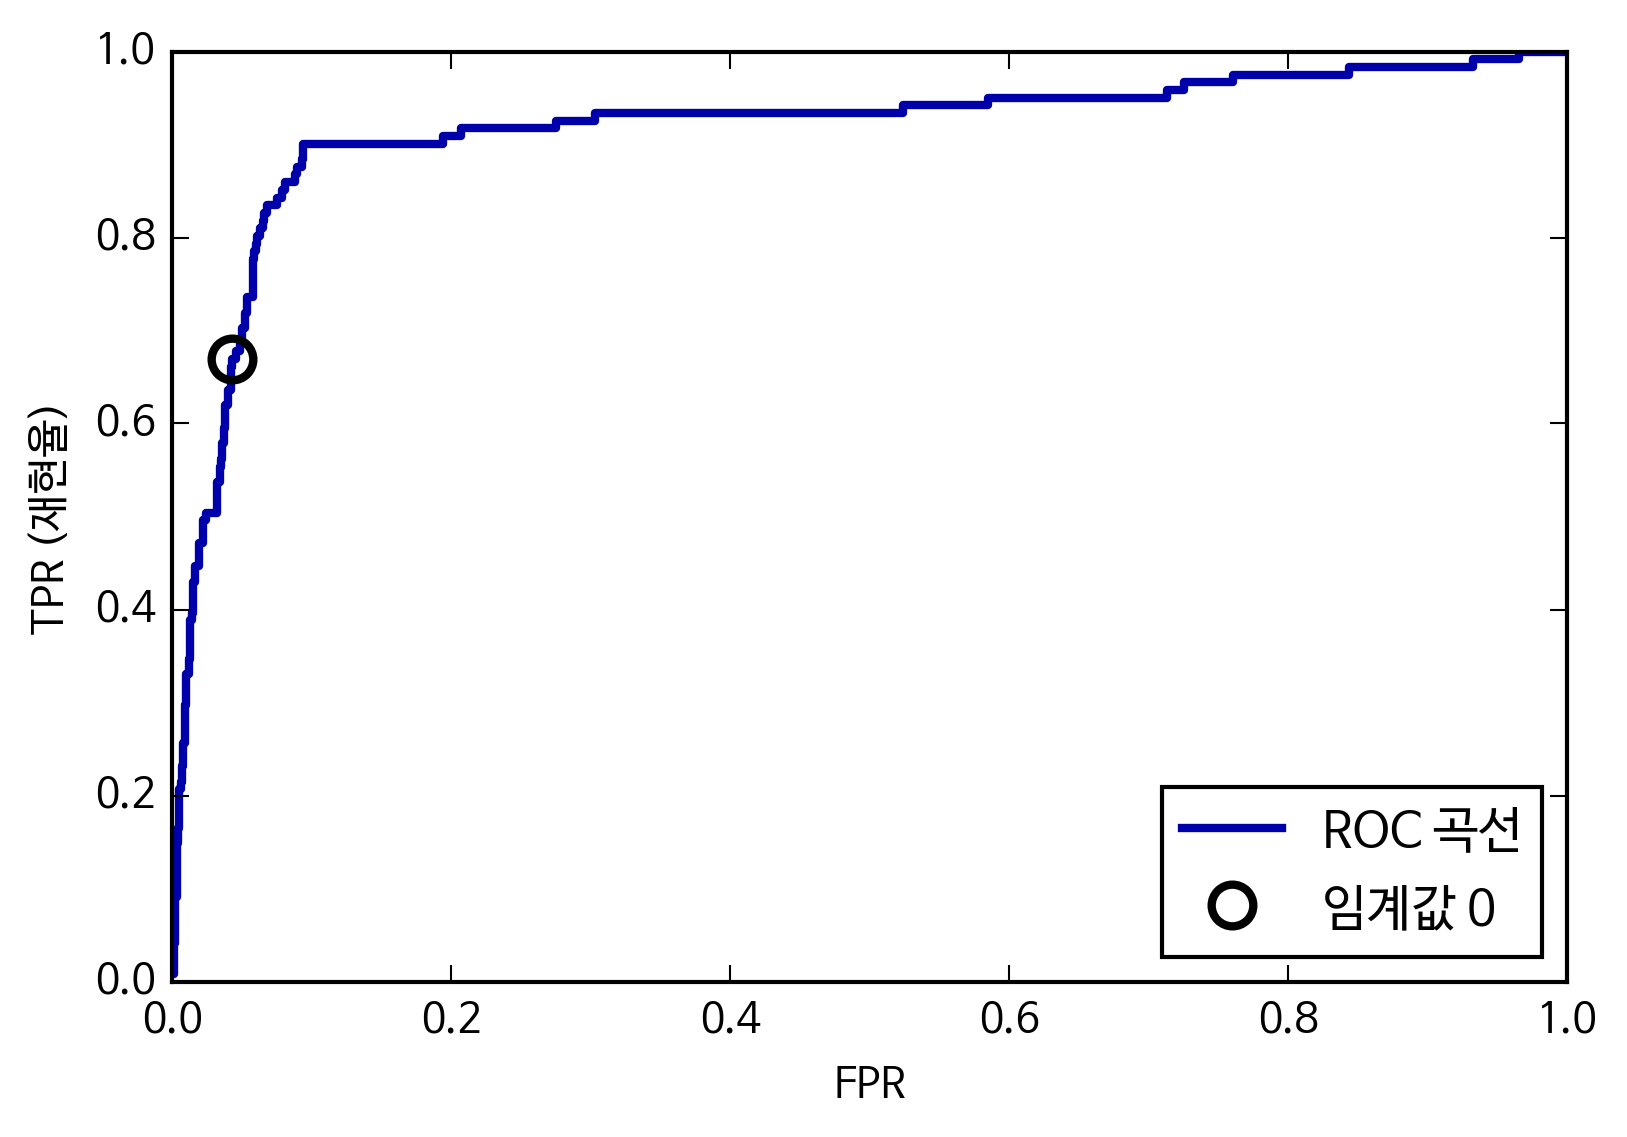

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

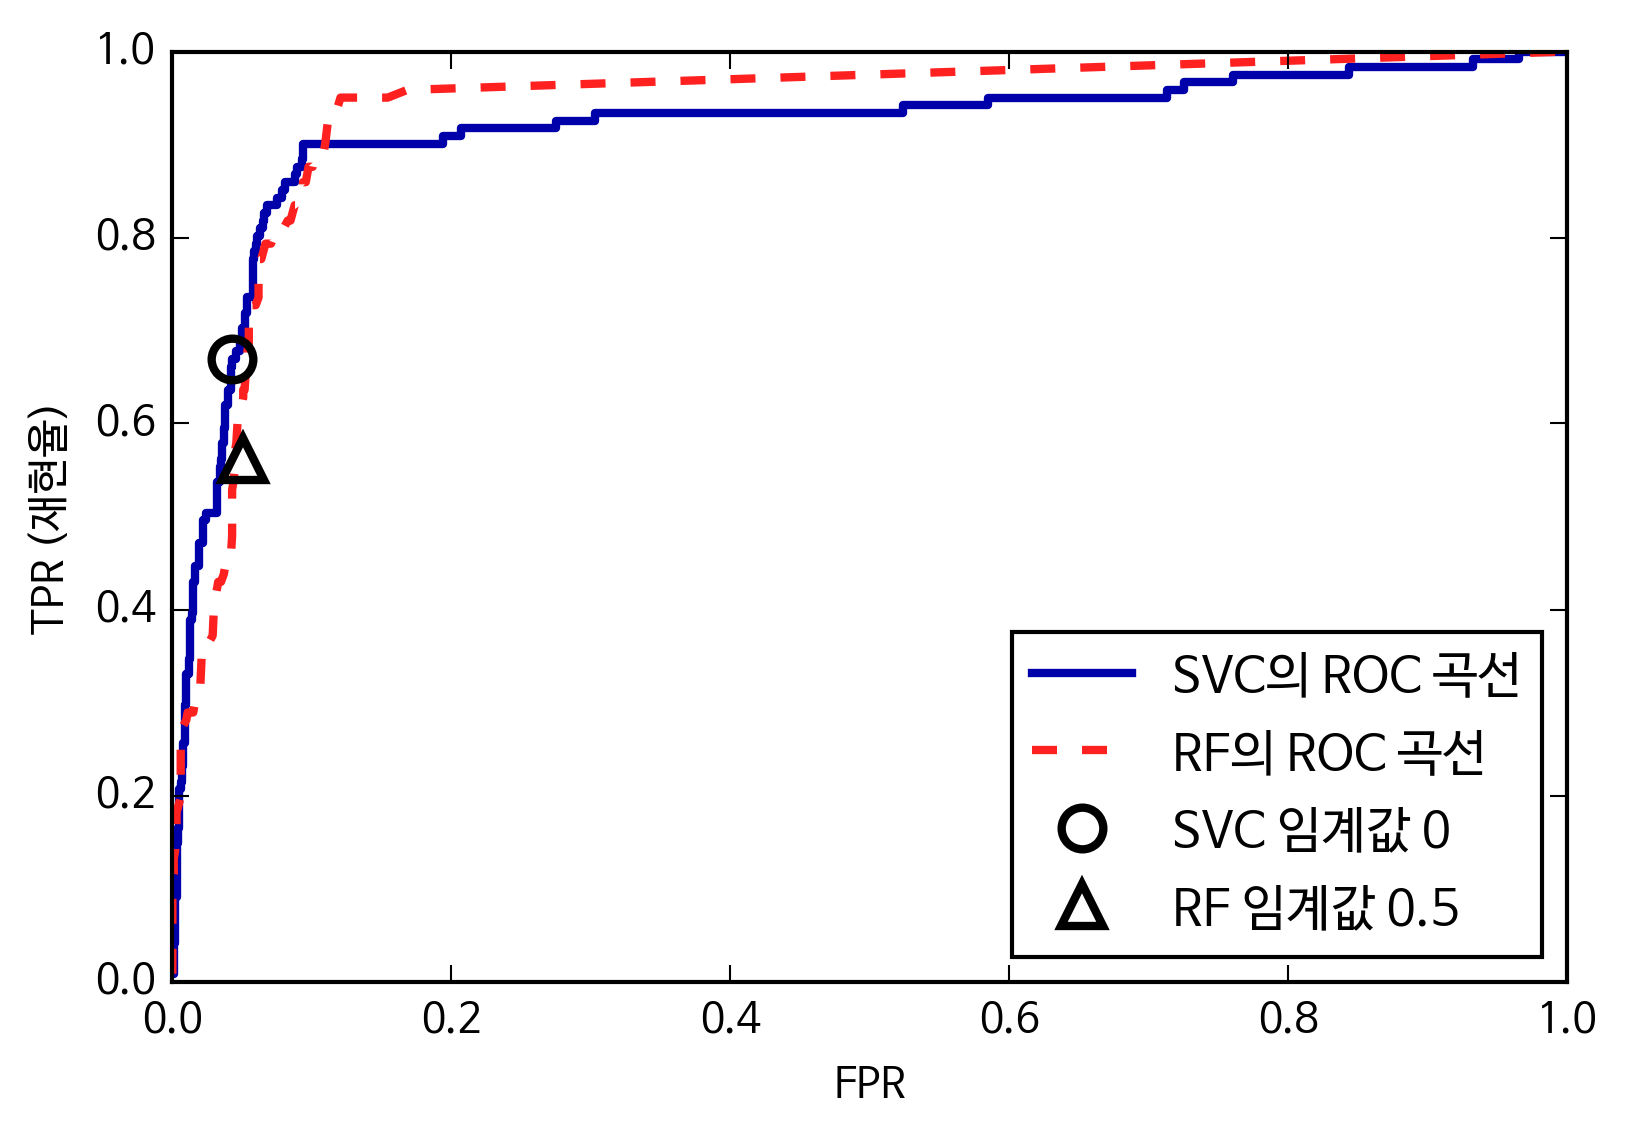

In [64]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [65]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


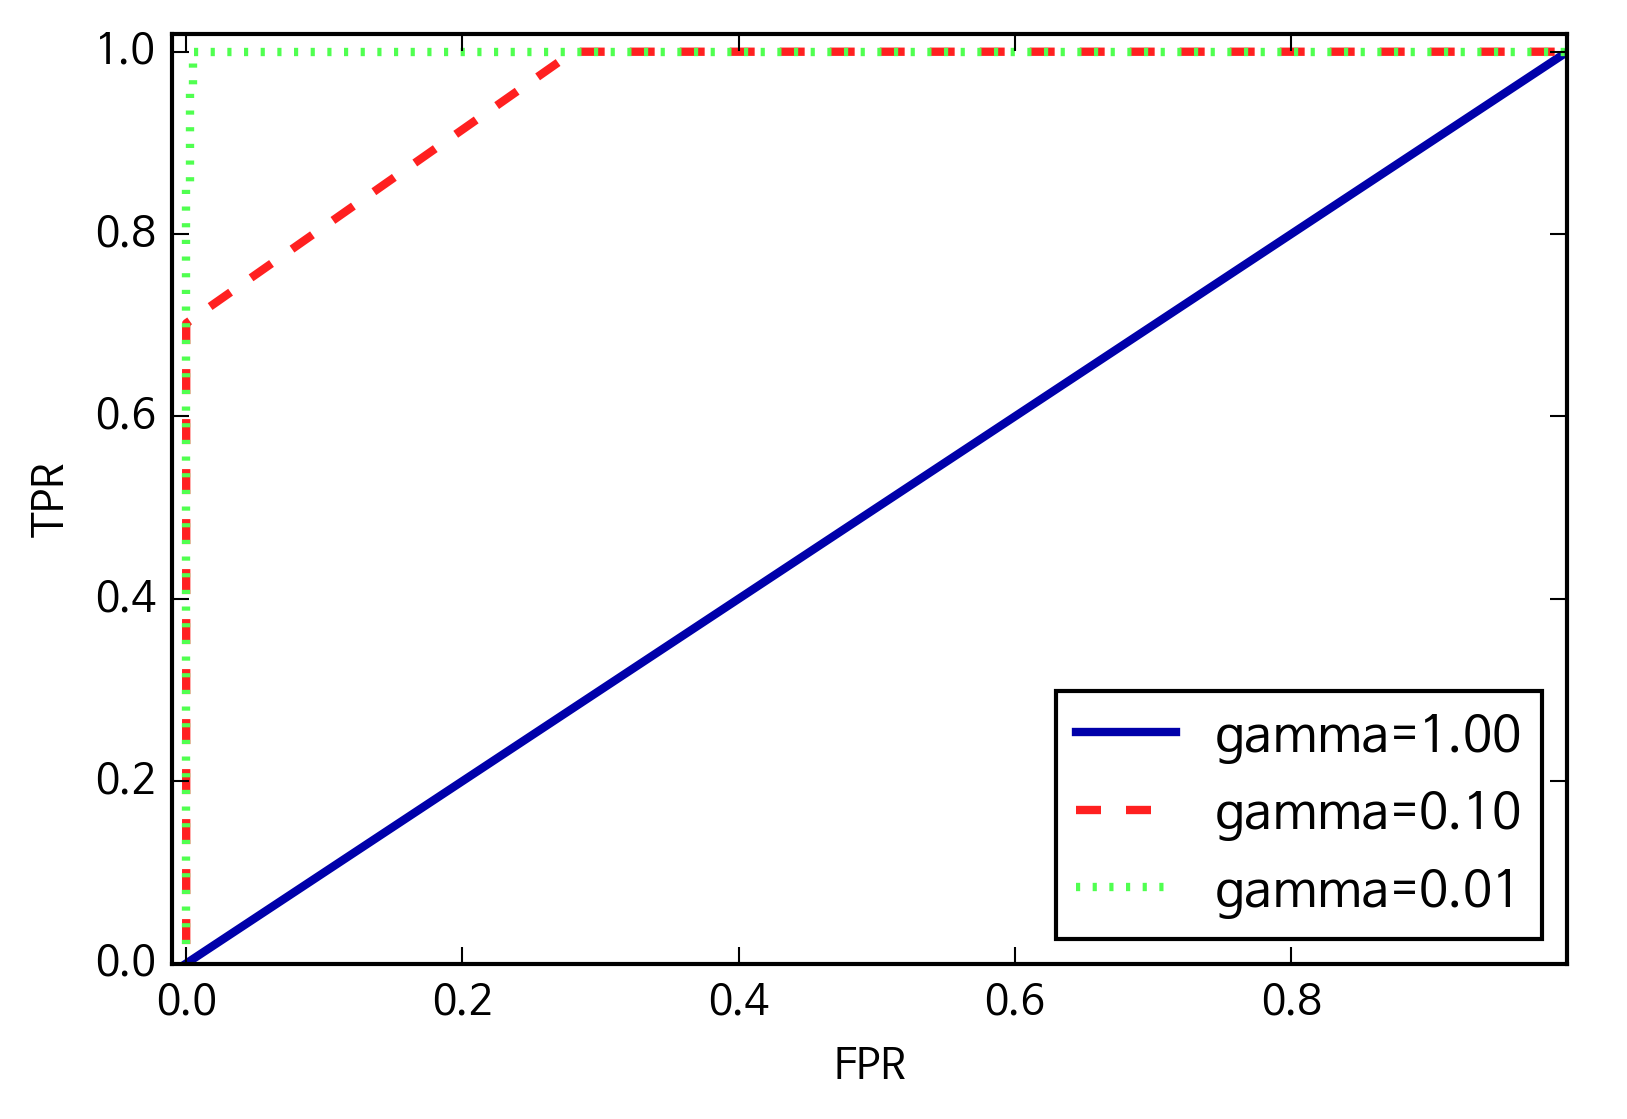

In [95]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
            gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### 다중 분류의 측정 지표

In [69]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


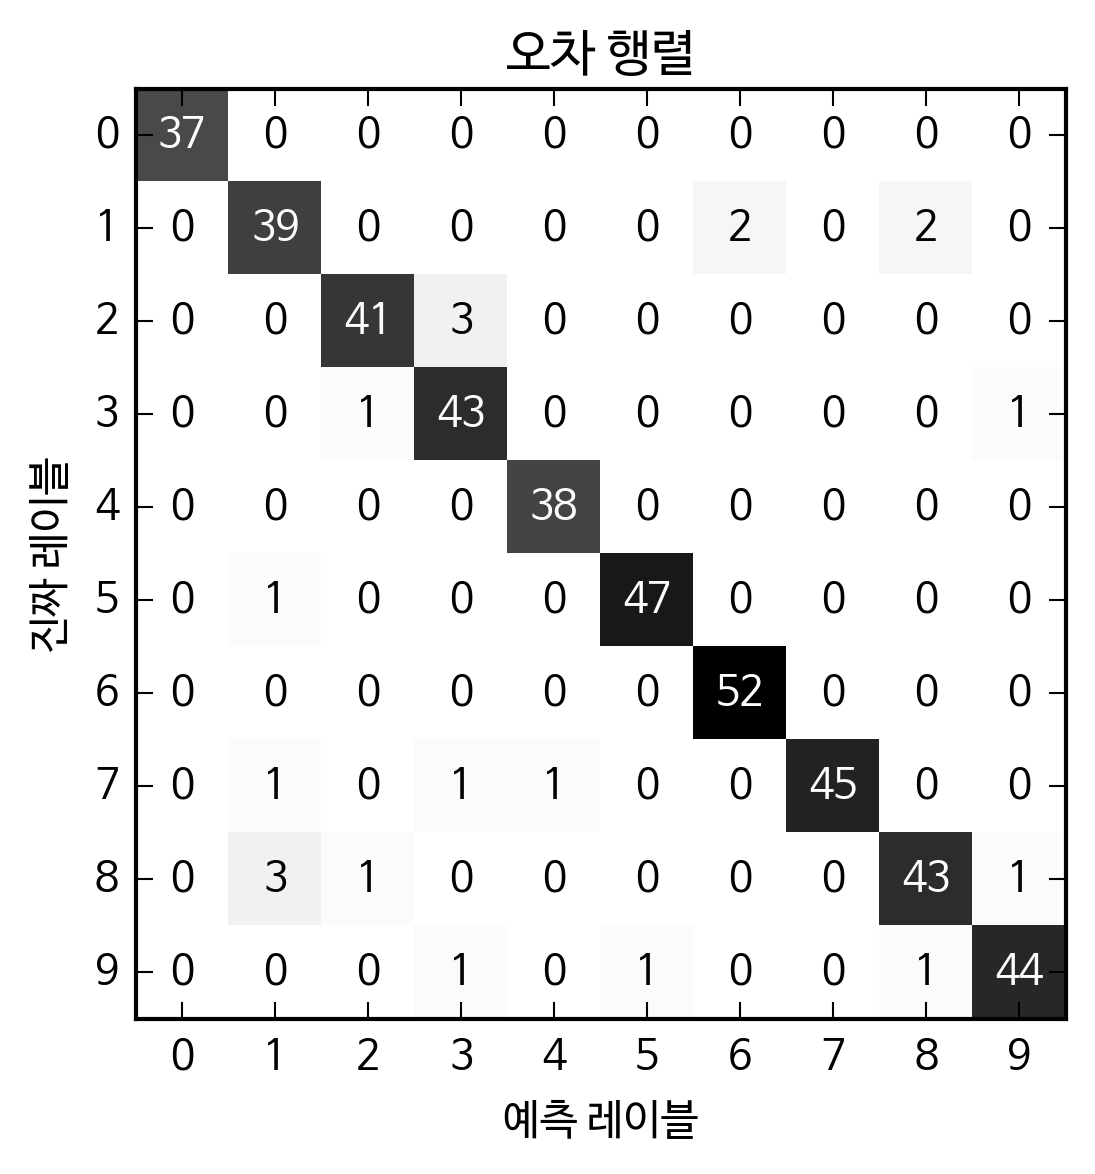

In [70]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [71]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [73]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


#### 회귀 측정 지표

### 모델 선택에서 평가 지표 사용하기

In [74]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표: {}".format(
      cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC 지표: {}".format(roc_auc))

기본 평가 지표: [ 0.9  0.9  0.9]
정확도 지표: [ 0.9  0.9  0.9]
AUC 지표: [ 0.994  0.99   0.996]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 크로스 밸리데이션 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 accuracy: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 크로스 밸리데이션 점수 (정확도)): 0.970
테스트 세트 AUC: 0.992
테스트 세트 accuracy: 0.973


In [76]:
# AUC 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 크로스 밸리데이션 점수 (AUC): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

AUC 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 크로스 밸리데이션 점수 (AUC): 0.997
테스트 세트 AUC: 1.000
테스트 세트 정확도: 1.000


In [79]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n{}".format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


### Summary and outlook